<a class="anchor" id="0"></a>
# Cryptocurrency : Advanced Analysis & Forecasting

This notebook is devoted to **system analysis and forecasting of the given cryptocurrency** (for example, "BTC" = Bitcoin, but it is easy to replace in the variable "cryptocurrency"): 
* Exploratory Data Analysis (EDA)
* Feature Engineering (FE) - synthesis and research of new features (internal and external factors)
* Data preprocessing and get target
* Building and tuning of many models of Machine Learning (ML) and choosing the optimal among them 
* Data forecasting 
* Analysis of forecasting accuracy and the importance of features

This notebook section provides examples of identifying the following **ML models** (but the list goes on):
* Facebook Prophet 
* ARIMA (and AutoARIMA)
* Linear Regression
* KNeighbors Regressor
* Support Vector Machines
* Linear SVR
* Random Forest Regressor
* Bagging Regressor
* XGB Regressor
* MLP Regressor

## Acknowledgements:
* data download and ML models training from the notebook [Crypto - BTC : 7 prediction models](https://www.kaggle.com/code/vbmokin/crypto-btc-7-prediction-models)
* FE - from the notebooks: 
    - [BTC Growth Forecasting with Advanced FE for OHLC](https://www.kaggle.com/code/vbmokin/btc-growth-forecasting-with-advanced-fe-for-ohlc)
    - [G-Research Crypto Forecasting - baseline & FE](https://www.kaggle.com/code/vbmokin/g-research-crypto-forecasting-baseline-fe)
    - [GResearch Simple LGB Starter](https://www.kaggle.com/code1110/gresearch-simple-lgb-starter)
    - [COVID in UA: Prophet with 4, Nd seasonality](https://www.kaggle.com/code/vbmokin/crypto-btc-advanced-analysis-forecasting-d)
    - [COVID-19 in 70 countries: daily Prophet forecast](https://www.kaggle.com/code/vbmokin/covid-19-in-70-countries-daily-prophet-forecast)
* Stationarity check from the notebook [Time Series: Interpreting ACF and PACF](https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf)
* [How to Check if Time Series Data is Stationary with Python](https://machinelearningmastery.com/time-series-data-stationary-python/)
* candle OHLC-chart from the notebook [Cryptocurrency Data Visualization + ARIMA 💰](https://www.kaggle.com/code/fangya/cryptocurrency-data-visualization-arima)
* about cryptocurrencies - dataset [Forecasting Top Cryptocurrencies](https://www.kaggle.com/datasets/vbmokin/forecasting-top-cryptocurrencies)
* data about cryptocurrency source via API: https://finance.yahoo.com/cryptocurrencies/
* data about COVID-19 via API: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

- The main code of this notebook was written or compiled from many notebooks by **Kaggle Grandmaster, Dr. Eng. Sc., Prof. [Vitalii Mokin](https://www.kaggle.com/vbmokin)**

- The notebook uses material taught to students and graduate students in Ukraine at Vinnytsia National Technical University for **[educational programs of bachelor's, master's and postgraduate programs in specialties 124 System Analysis and 126 Information Systems and Technologies](https://mmss.vntu.edu.ua/index.php/ua/)** (Chair of System Analysis and Information Technologies, Head - Vitalii Mokin).

- This notebook uses material of the textbook **"Mokin V.B., etc. Technologies of processing and modeling of ecological and economic information. Textbook. 2nd edition. Vinnytsia: VNTU, 2022"(Ukrainian).**

- Chapters 3. "EDA" and 4. "FE" of the notebook use material from the scientific paper **"Mokin V.B., etc."Information Technology for the Cryptocurrency Rate Forecasting on the Basics of Complex Feature Engineering". [Visnyk VPI](https://visnyk.vntu.edu.ua/index.php/visnyk). No 2 (2022).**

A detailed description of the notebook, all ideas, tips on using and adapting to other cryptocurrencies and other tasks of analysis and forecasting of time series (**in Ukrainian**) is available in **VIDEO on the author's YouTube channel in the playlist "Курс AI-ML-DS Training на Python": ["Аналіз та прогнозування часових рядів на прикладі курсу біткоїна"](https://www.youtube.com/watch?v=hodUvdBC3js&list=PL4DHq-xU-ebUiB6T6vjd0SoDha4GOm8zV&index=23)**

<a class="anchor" id="0.1"></a>

## Table of Contents

1. [Import libraries and set parameters](#1)
1. [Download data](#2)
1. [EDA](#3)
   - [3.1 Market Cap](#3.1)
   - [3.2 Cryptocurrency data](#3.2)
   - [3.3 Cryptocurrency features data](#3.3)
   - [3.4 Stationarity check](#3.4)
   - [3.5 Identification of seasonality](#3.5)
   - [3.6 EDA with Pandas Profiling Report](#3.6)   
1. [FE](#4)
   - [4.1 FE with TSFRESH](#4.1)
   - [4.2 FE from technical features (Finance knowledge and Data Science)](#4.2)
   - [4.3 Analysis of anomalies](#4.3)
       - [4.3.1 Analysis of anomalies for "Close"](#4.3.1)
       - [4.3.2 Analysis of anomalies for the first data difference "Close_diff"](#4.3.2)
   - [4.4 Analysis of the impact of COVID-19 on the cryptocurrency rate](#4.4)
   - [4.5 Get target, training, validation and test datasets for ML models](#4.5)
1. [Model training and forecasting](#5)
    - [5.1 Facebook Prophet](#5.1)
    - [5.2 ARIMA](#5.2)
        - [5.2.1 How to find the order of differencing (d) in ARIMA model](#5.2.1)
        - [5.2.2 How to find the order of the AR term (p)](#5.2.2)
        - [5.2.3 How to find the order of the MA term (q)](#5.2.3)
        - [5.2.4 How to build the ARIMA Model with manually defined parameters](#5.2.4)
        - [5.2.5 How to build the ARIMA automatically](#5.2.5)
    - [5.3 Other ML models (Multi-factors models)](#5.3)
        - [5.3.1 Set parameters for many models](#5.3.1)
        - [5.3.2 Models training and forecasting](#5.3.2)
    - [5.4 Choosing the main optimal model and forecasting](#5.4)
    - [5.5 Feature importance study](#5.5)    

## 1. Import libraries and set parameters <a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

In [1]:
# Import libraries
import random
import os
import numpy as np 
import pandas as pd 
import requests
import pandas_datareader as web

# Date
import datetime as dt
from datetime import date, timedelta, datetime

# EDA
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import pandas_profiling as pp

# FE
from tsfresh import extract_features, select_features, extract_relevant_features
from tsfresh.utilities.dataframe_functions import impute
from sklearn.inspection import permutation_importance
import eli5
from eli5.sklearn import PermutationImportance
import shap

# Time Series - EDA and Modelling
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Modeling and preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from prophet import Prophet
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
# What EDA & FE techniques use?
is_EDA_with_Pandas_Profiling = True # or False - Get Pandas Profiling Report or no?
is_EDA_with_COVID19_data = True # or False - Make EDA with COVID-19 data or no?
is_anomalies = True # or False - Take into account anomalies or no?

In [3]:
# What type of model to use?
is_Prophet = True   # or False - Facebook Prophet
is_ARIMA = True     # or False - ARIMA and AutoARIMA
is_other_ML = True  # or False - multi-factors models: trees, neural networks, etc.

In [4]:
# Automatic building ARIMA for Time Series
if is_ARIMA:
    !pip install pmdarima
    import pmdarima as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.4 MB/s eta 0:00:00


In [5]:
# Set random state
def fix_all_seeds(seed):
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

random_state = 42
fix_all_seeds(random_state)

**TASK:** It is proposed to experiment with forecasting_days

In [6]:
# Set main parameters
cryptocurrency = 'BTC'
target = 'Close'
forecasting_days = 10  # forecasting_days > 1

**TASK :** It is proposed to experiment with date_start and date_end

In [7]:
# Set time interval of data for given cryptocurrency - the period of coronavirus in 2020-2021
date_start = dt.datetime(2020, 4, 1)
# date_end = dt.datetime.now()
date_end = dt.datetime(2021, 12, 31)
print(f"Time interval: from {date_start} to {date_end}")

Time interval: from 2020-04-01 00:00:00 to 2021-12-31 00:00:00


## 2. Download data <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

In [8]:
# Download information about cryptocurrencies
df_about = pd.read_csv("../input/forecasting-top-cryptocurrencies/about_top_cryptocurrencies_1B_information.csv", sep=";")
display(df_about)

name  code       price    market_cap circulating_supply  \
0                 Bitcoin   BTC  40489.7600  7.684140e+11       19008968 BTC   
1                Ethereum   ETH   3028.0700  3.636100e+11      120337497 ETH   
2                  Tether  USDT      1.0000  8.256138e+10   82534930597 USDT   
3            Binance Coin   BNB    402.3900  6.631336e+10      165116761 BNB   
4                USD Coin  USDC      0.9999  5.076033e+10   50775064050 USDC   
..                    ...   ...         ...           ...                ...   
78                   Dash  DASH    102.8700  1.093739e+09      10670582 DASH   
79  Basic Attention Token   BAT      0.6992  1.046690e+09     1499204735 BAT   
80        Curve DAO Token   CRV      2.2000  1.037045e+09      472211772 CRV   
81                Arweave    AR     30.5700  1.016909e+09        33394701 AR   
82           Neutrino USD  USDN      0.9772  1.001502e+09    1025293991 USDN   

   limit_supply                       basic_information  initial_release  \
0      21000000   https://en.wikipedia.org/wiki/Bitcoin           2009.0   
1           NaN  https://en.wikipedia.org/wiki/Ethereum           2015.0   
2           NaN                                     NaN              NaN   
3           NaN              https://www.binance.com/en           2017.0   
4           NaN                                     NaN              NaN   
..          ...                                     ...              ...   
78          NaN                                     NaN              NaN   
79          NaN                                     NaN              NaN   
80          NaN                                     NaN              NaN   
81          NaN                                     NaN              NaN   
82          NaN                                     NaN              NaN   

    block_reward  block_time_sec  block_size_Mb basic_project  \
0           6.25           600.0            2.0       Bitcoin   
1            NaN             NaN            NaN      Ethereum   
2            NaN             NaN            NaN           NaN   
3            NaN             NaN            NaN           NaN   
4            NaN             NaN            NaN           NaN   
..           ...             ...            ...           ...   
78           NaN             NaN            NaN           NaN   
79           NaN             NaN            NaN           NaN   
80           NaN             NaN            NaN           NaN   
81           NaN             NaN            NaN           NaN   
82           NaN             NaN            NaN           NaN   

                           specifics            Kaggle_competitions  
0           the first cryptocurrency  G-Research Crypto Forecasting  
1                                NaN  G-Research Crypto Forecasting  
2                                NaN                            NaN  
3   payments on the exchange Binance  G-Research Crypto Forecasting  
4                                NaN                            NaN  
..                               ...                            ...  
78                               NaN                            NaN  
79                               NaN                            NaN  
80                               NaN                            NaN  
81                               NaN                            NaN  
82                               NaN                            NaN  

[83 rows x 14 columns]

In [9]:
def get_part_number(x):
    # Get 1 - st, 2 - nd, 3 - rd, 4.. - th in the first, second, third, ...
    if x==1:
        return 'st'
    elif x==2:
        return 'nd'
    elif x==3:
        return 'rd'
    else: return 'th'

In [10]:
def get_rank_cryptocurrency(cryptocurrency):
    # Get rank by Market Cap for code of the cryptocurrency
    # Download the dataset from https://www.kaggle.com/datasets/vbmokin/forecasting-top-cryptocurrencies
    
    place = df_about.index[df_about['code'] == cryptocurrency].tolist()[0]
    print(f"{df_about.loc[place, 'name']} was {place+1}{get_part_number(place+1)}",
          "among the world's cryptocurrencies by market capitalization (2022-04-11)")
    
# Get rank by Market Cap of the cryptocurrency
get_rank_cryptocurrency(cryptocurrency)

Bitcoin was 1st among the world's cryptocurrencies by market capitalization (2022-04-11)


In [11]:
def get_data(cryptocurrency, date_start, date_end=None):
    # Get data for given cryptocurrency in USD from Yahoo.finance and https://coinmarketcap.com/
    # date_end = None means that the date_end is the current day
    
    if date_end is None:
        date_end = dt.datetime.now()
    df = web.DataReader(f'{cryptocurrency}-USD', 'yahoo', date_start, date_end)
    
    return df

# Download data of the cryptocurrency via API
df = get_data(cryptocurrency, date_start, date_end)
df

High           Low          Open         Close  \
Date                                                                 
2020-04-01   6612.573730   6202.373535   6437.319336   6606.776367   
2020-04-02   7088.247559   6595.918457   6606.776367   6793.624512   
2020-04-03   7003.220703   6673.335938   6797.396484   6733.387207   
2020-04-04   6878.953613   6696.484863   6738.382812   6867.527344   
2020-04-05   6883.414062   6715.929199   6862.537598   6791.129395   
...                  ...           ...           ...           ...   
2021-12-28  50679.859375  47414.210938  50679.859375  47588.855469   
2021-12-29  48119.742188  46201.496094  47623.871094  46444.710938   
2021-12-30  47879.964844  46060.312500  46490.605469  47178.125000   
2021-12-31  48472.527344  45819.953125  47169.371094  46306.445312   
2022-01-01  47827.312500  46288.484375  46311.746094  47686.812500   

                 Volume     Adj Close  
Date                                   
2020-04-01  40346426266   6606.776367  
2020-04-02  47660646124   6793.624512  
2020-04-03  38976504903   6733.387207  
2020-04-04  33185988584   6867.527344  
2020-04-05  29510409856   6791.129395  
...                 ...           ...  
2021-12-28  33430376883  47588.855469  
2021-12-29  30049226299  46444.710938  
2021-12-30  26686491018  47178.125000  
2021-12-31  36974172400  46306.445312  
2022-01-01  24582667004  47686.812500  

[641 rows x 6 columns]

In [12]:
# Correlation coefficients
df.corr()

High       Low      Open     Close    Volume  Adj Close
High       1.000000  0.997663  0.998863  0.998738  0.347835   0.998738
Low        0.997663  1.000000  0.997719  0.998496  0.314317   0.998496
Open       0.998863  0.997719  1.000000  0.997086  0.338059   0.997086
Close      0.998738  0.998496  0.997086  1.000000  0.333376   1.000000
Volume     0.347835  0.314317  0.338059  0.333376  1.000000   0.333376
Adj Close  0.998738  0.998496  0.997086  1.000000  0.333376   1.000000

In [13]:
# Correlation coefficients
df.corr()['Close']

High         0.998738
Low          0.998496
Open         0.997086
Close        1.000000
Volume       0.333376
Adj Close    1.000000
Name: Close, dtype: float64

In [14]:
df = df.drop(columns = ["Adj Close"])
df

High           Low          Open         Close  \
Date                                                                 
2020-04-01   6612.573730   6202.373535   6437.319336   6606.776367   
2020-04-02   7088.247559   6595.918457   6606.776367   6793.624512   
2020-04-03   7003.220703   6673.335938   6797.396484   6733.387207   
2020-04-04   6878.953613   6696.484863   6738.382812   6867.527344   
2020-04-05   6883.414062   6715.929199   6862.537598   6791.129395   
...                  ...           ...           ...           ...   
2021-12-28  50679.859375  47414.210938  50679.859375  47588.855469   
2021-12-29  48119.742188  46201.496094  47623.871094  46444.710938   
2021-12-30  47879.964844  46060.312500  46490.605469  47178.125000   
2021-12-31  48472.527344  45819.953125  47169.371094  46306.445312   
2022-01-01  47827.312500  46288.484375  46311.746094  47686.812500   

                 Volume  
Date                     
2020-04-01  40346426266  
2020-04-02  47660646124  
2020-04-03  38976504903  
2020-04-04  33185988584  
2020-04-05  29510409856  
...                 ...  
2021-12-28  33430376883  
2021-12-29  30049226299  
2021-12-30  26686491018  
2021-12-31  36974172400  
2022-01-01  24582667004  

[641 rows x 5 columns]

## 3. EDA <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

### 3.1. Market Cap <a class="anchor" id="3.1"></a>

[Back to Table of Contents](#0.1)

In [15]:
# Market Cap
crypto = pd.Series(df_about.market_cap.head(20).tolist(), index=df_about.name.head(20).tolist(), name="Капіталізація ринка")
crypto.plot.pie(figsize=(10, 10))

<AxesSubplot:ylabel='Капіталізація ринка'>

### 3.2. Cryptocurrency data <a class="anchor" id="3.2"></a>

[Back to Table of Contents](#0.1)

In [16]:
df['Close'].plot(grid=True, figsize=(12,8))

<AxesSubplot:xlabel='Date', ylabel='Капіталізація ринка'>

### 3.3. Cryptocurrency features data <a class="anchor" id="3.3"></a>

[Back to Table of Contents](#0.1)

In [17]:
display(df)

High           Low          Open         Close  \
Date                                                                 
2020-04-01   6612.573730   6202.373535   6437.319336   6606.776367   
2020-04-02   7088.247559   6595.918457   6606.776367   6793.624512   
2020-04-03   7003.220703   6673.335938   6797.396484   6733.387207   
2020-04-04   6878.953613   6696.484863   6738.382812   6867.527344   
2020-04-05   6883.414062   6715.929199   6862.537598   6791.129395   
...                  ...           ...           ...           ...   
2021-12-28  50679.859375  47414.210938  50679.859375  47588.855469   
2021-12-29  48119.742188  46201.496094  47623.871094  46444.710938   
2021-12-30  47879.964844  46060.312500  46490.605469  47178.125000   
2021-12-31  48472.527344  45819.953125  47169.371094  46306.445312   
2022-01-01  47827.312500  46288.484375  46311.746094  47686.812500   

                 Volume  
Date                     
2020-04-01  40346426266  
2020-04-02  47660646124  
2020-04-03  38976504903  
2020-04-04  33185988584  
2020-04-05  29510409856  
...                 ...  
2021-12-28  33430376883  
2021-12-29  30049226299  
2021-12-30  26686491018  
2021-12-31  36974172400  
2022-01-01  24582667004  

[641 rows x 5 columns]

In [18]:
def c_chart(data,label):
    # Thanks to https://www.kaggle.com/code/fangya/cryptocurrency-data-visualization-arima
    candlestick = go.Figure(data = [go.Candlestick(x=data.index,
                                                   open = data['Open'], 
                                                   high = data['High'], 
                                                   low = data['Low'], 
                                                   close = data['Close'])])
    candlestick.update_xaxes(title_text = 'Time',
                             rangeslider_visible = True)

    candlestick.update_layout(
    title = {
            'text': '{:} Candelstick Chart'.format(label),
            "y":0.8,
            "x":0.5,
            'xanchor': 'center',
            'yanchor': 'top'})

    candlestick.update_yaxes(title_text = 'Price in USD', ticksuffix = '$')
    return candlestick

In [19]:
%matplotlib inline
btc_candle=c_chart(df, label="BTC Price")
btc_candle.show()

### 3.4. Stationarity check <a class="anchor" id="3.4"></a>

[Back to Table of Contents](#0.1)

Thanks to [Time Series: Interpreting ACF and PACF](https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf)

ACF and PACF assume stationarity of the underlying time series.
Staionarity can be checked by performing an **Augmented Dickey-Fuller (ADF) test**:

> - p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
> - p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
>
> [...] We can see that our [ADF] statistic value [...] is less than the value [...] at 1%.
This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).
Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure. - [Machine Learning Mastery: How to Check if Time Series Data is Stationary with Python](https://machinelearningmastery.com/time-series-data-stationary-python/)

If the time series is stationary, continue to the next steps.
**If the time series is not stationary, try differencing the time series** and check its stationarity again.


In [20]:
def check_stationarity(series):
    # Thanks to https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [21]:
# Stationarity check
check_stationarity(df['Close'])

ADF Statistic: -1.257597
p-value: 0.648342
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
Non-stationary


In [22]:
# Stationarity check of the first difference of time series
check_stationarity(df['Close'].diff().dropna())

ADF Statistic: -26.335628
p-value: 0.000000
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
Stationary


In [23]:
# Stationarity check of the second difference of time series
check_stationarity(df['Close'].diff().diff().dropna())

ADF Statistic: -9.633372
p-value: 0.000000
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569
Stationary


Therefore, it is necessary to model the first difference of the series:

In [24]:
df['Close_diff'] = df['Close'].diff()
df = df.dropna()
df

High           Low          Open         Close  \
Date                                                                 
2020-04-02   7088.247559   6595.918457   6606.776367   6793.624512   
2020-04-03   7003.220703   6673.335938   6797.396484   6733.387207   
2020-04-04   6878.953613   6696.484863   6738.382812   6867.527344   
2020-04-05   6883.414062   6715.929199   6862.537598   6791.129395   
2020-04-06   7271.781250   6782.889648   6788.049805   7271.781250   
...                  ...           ...           ...           ...   
2021-12-28  50679.859375  47414.210938  50679.859375  47588.855469   
2021-12-29  48119.742188  46201.496094  47623.871094  46444.710938   
2021-12-30  47879.964844  46060.312500  46490.605469  47178.125000   
2021-12-31  48472.527344  45819.953125  47169.371094  46306.445312   
2022-01-01  47827.312500  46288.484375  46311.746094  47686.812500   

                 Volume   Close_diff  
Date                                  
2020-04-02  47660646124   186.848145  
2020-04-03  38976504903   -60.237305  
2020-04-04  33185988584   134.140137  
2020-04-05  29510409856   -76.397949  
2020-04-06  46896904615   480.651855  
...                 ...          ...  
2021-12-28  33430376883 -3051.562500  
2021-12-29  30049226299 -1144.144531  
2021-12-30  26686491018   733.414062  
2021-12-31  36974172400  -871.679688  
2022-01-01  24582667004  1380.367188  

[640 rows x 6 columns]

### 3.5. Identification of seasonality <a class="anchor" id="3.5"></a>

[Back to Table of Contents](#0.1)

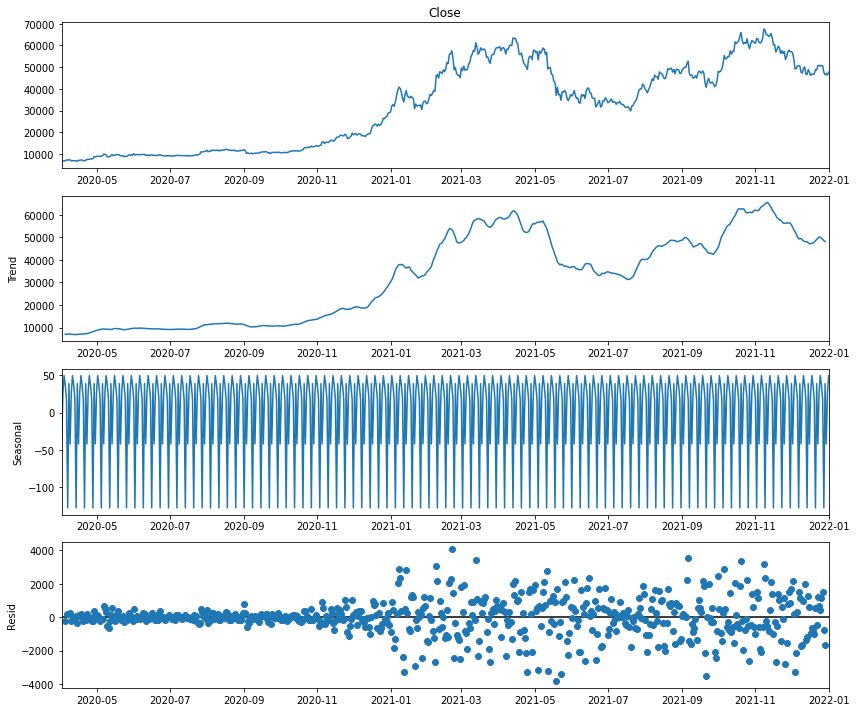

In [25]:
# Get seasonality of the time series
decomp = seasonal_decompose(df.Close)
fig = decomp.plot()
fig.set_size_inches((12, 10))
fig.tight_layout()
plt.show()

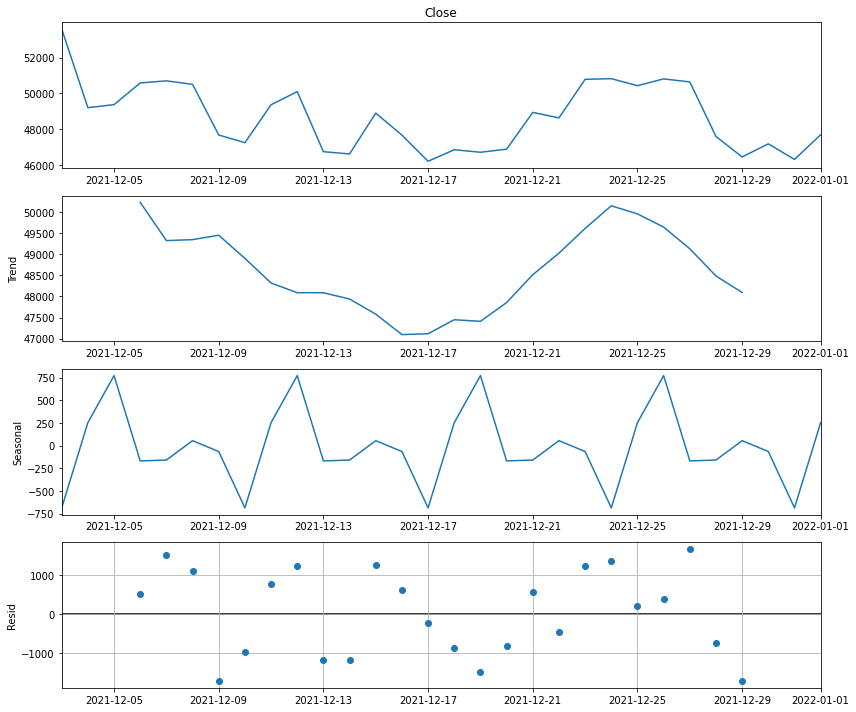

In [26]:
# Get seasonality of last months (Dec 2021) of the time series
decomposition = seasonal_decompose(df.tail(30).Close)
fig = decomposition.plot()
fig.set_size_inches((12, 10))
fig.tight_layout()
plt.grid(True)
plt.show()

There is a weekly seasonality, but its contribution is very small, so it can be neglected.

### 3.6. EDA with Pandas Profiling Report <a class="anchor" id="3.6"></a>

[Back to Table of Contents](#0.1)

In [27]:
%%time
if is_EDA_with_Pandas_Profiling:
    profile = df.profile_report(title='Pandas Profiling Report for dataset')
    profile.to_file(output_file="profile.html")
    display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 22.3 s, sys: 10.3 s, total: 32.7 s
Wall time: 17.8 s


## 4. FE <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)

### 4.1. FE with TSFRESH<a class="anchor" id="4.1"></a>

[Back to Table of Contents](#0.1)

In [28]:
def get_tsfresh_features(data):
    # Get statistic features using library TSFRESH 
    # Thanks to https://www.kaggle.com/code/vbmokin/btc-growth-forecasting-with-advanced-fe-for-ohlc
    
    data = data.reset_index(drop=False).reset_index(drop=False)
    
    # Extract features
    extracted_features = extract_features(data, column_id="Date", column_sort="Date")
    
    # Drop features with NaN
    extracted_features_clean = extracted_features.dropna(axis=1, how='all').reset_index(drop=True)
    
    # Drop features with constants
    cols_std_zero  = []
    for col in extracted_features_clean.columns:
        if extracted_features_clean[col].std()==0:
            cols_std_zero.append(col)
    extracted_features_clean = extracted_features_clean.drop(columns = cols_std_zero)

    extracted_features_clean['Date'] = data['Date']   # For the merging
    
    return extracted_features_clean

In [29]:
%%time
# FE with TSFRESH
extracted_features_clean = get_tsfresh_features(df[['Close']])
extracted_features_clean

Feature Extraction: 100%|██████████| 10/10 [00:20<00:00,  2.00s/it]


CPU times: user 6.84 s, sys: 334 ms, total: 7.17 s
Wall time: 24 s


index__sum_values  index__abs_energy  index__median  index__mean  \
0                  0.0                0.0            0.0          0.0   
1                  1.0                1.0            1.0          1.0   
2                  2.0                4.0            2.0          2.0   
3                  3.0                9.0            3.0          3.0   
4                  4.0               16.0            4.0          4.0   
..                 ...                ...            ...          ...   
635              635.0           403225.0          635.0        635.0   
636              636.0           404496.0          636.0        636.0   
637              637.0           405769.0          637.0        637.0   
638              638.0           407044.0          638.0        638.0   
639              639.0           408321.0          639.0        639.0   

     index__root_mean_square  index__maximum  index__absolute_maximum  \
0                        0.0             0.0                      0.0   
1                        1.0             1.0                      1.0   
2                        2.0             2.0                      2.0   
3                        3.0             3.0                      3.0   
4                        4.0             4.0                      4.0   
..                       ...             ...                      ...   
635                    635.0           635.0                    635.0   
636                    636.0           636.0                    636.0   
637                    637.0           637.0                    637.0   
638                    638.0           638.0                    638.0   
639                    639.0           639.0                    639.0   

     index__minimum  index__benford_correlation  index__quantile__q_0.1  ...  \
0               0.0                         NaN                     0.0  ...   
1               1.0                    0.864123                     1.0  ...   
2               2.0                    0.295657                     2.0  ...   
3               3.0                    0.062915                     3.0  ...   
4               4.0                   -0.064614                     4.0  ...   
..              ...                         ...                     ...  ...   
635           635.0                   -0.200946                   635.0  ...   
636           636.0                   -0.200946                   636.0  ...   
637           637.0                   -0.200946                   637.0  ...   
638           638.0                   -0.200946                   638.0  ...   
639           639.0                   -0.200946                   639.0  ...   

     Close__quantile__q_0.7  Close__quantile__q_0.8  Close__quantile__q_0.9  \
0               6793.624512             6793.624512             6793.624512   
1               6733.387207             6733.387207             6733.387207   
2               6867.527344             6867.527344             6867.527344   
3               6791.129395             6791.129395             6791.129395   
4               7271.781250             7271.781250             7271.781250   
..                      ...                     ...                     ...   
635            47588.855469            47588.855469            47588.855469   
636            46444.710938            46444.710938            46444.710938   
637            47178.125000            47178.125000            47178.125000   
638            46306.445312            46306.445312            46306.445312   
639            47686.812500            47686.812500            47686.812500   

     Close__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)  \
0                                          4166.471752              
1                                          4129.528729              
2                                          4211.795726              
3                                          4164.941518           

In [30]:
extracted_features_clean.describe()

index__sum_values  index__abs_energy  index__median  index__mean  \
count         640.000000         640.000000     640.000000   640.000000   
mean          319.500000      136213.500000     319.500000   319.500000   
std           184.896367      122035.440404     184.896367   184.896367   
min             0.000000           0.000000       0.000000     0.000000   
25%           159.750000       25520.250000     159.750000   159.750000   
50%           319.500000      102080.500000     319.500000   319.500000   
75%           479.250000      229680.750000     479.250000   479.250000   
max           639.000000      408321.000000     639.000000   639.000000   

       index__root_mean_square  index__maximum  index__absolute_maximum  \
count               640.000000      640.000000               640.000000   
mean                319.500000      319.500000               319.500000   
std                 184.896367      184.896367               184.896367   
min                   0.000000        0.000000                 0.000000   
25%                 159.750000      159.750000               159.750000   
50%                 319.500000      319.500000               319.500000   
75%                 479.250000      479.250000               479.250000   
max                 639.000000      639.000000               639.000000   

       index__minimum  index__benford_correlation  index__quantile__q_0.1  \
count      640.000000                  639.000000              640.000000   
mean       319.500000                    0.145919              319.500000   
std        184.896367                    0.368681              184.896367   
min          0.000000                   -0.297356                0.000000   
25%        159.750000                   -0.145280              159.750000   
50%        319.500000                    0.062915              319.500000   
75%        479.250000                    0.295657              479.250000   
max        639.000000                    0.864123              639.000000   

       ...  Close__quantile__q_0.6  Close__quantile__q_0.7  \
count  ...              640.000000              640.000000   
mean   ...            32299.679340            32299.679340   
std    ...            19231.647331            19231.647331   
min    ...             6642.109863             6642.109863   
25%    ...            11283.858154            11283.858154   
50%    ...            34304.416016            34304.416016   
75%    ...            49017.857422            49017.857422   
max    ...            67566.828125            67566.828125   

       Close__quantile__q_0.8  Close__quantile__q_0.9  \
count              640.000000              640.000000   
mean             32299.679340            32299.679340   
std              19231.647331            19231.647331   
min               6642.109863             6642.109863   
25%              11283.858154            11283.858154   
50%              34304.416016            34304.416016   
75%              49017.857422            49017.857422   
max              67566.828125            67566.828125   

       Close__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)  \
count                                         640.000000              
mean                                        19809.116819              
std                                         11794.604664              
min                                          4073.549115              
25%                                          6920.293604              
50%                                         21038.604659              
75%                                         30062.232310              
max                                         41438.157243              

       Close__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)  \
count                                         640.000000              
mean                                        12528.385517              
std                                

In [31]:
# Extracted features by TSFRESH with cleaning
extracted_features_clean.columns.tolist()

['index__sum_values',
 'index__abs_energy',
 'index__median',
 'index__mean',
 'index__root_mean_square',
 'index__maximum',
 'index__absolute_maximum',
 'index__minimum',
 'index__benford_correlation',
 'index__quantile__q_0.1',
 'index__quantile__q_0.2',
 'index__quantile__q_0.3',
 'index__quantile__q_0.4',
 'index__quantile__q_0.6',
 'index__quantile__q_0.7',
 'index__quantile__q_0.8',
 'index__quantile__q_0.9',
 'index__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
 'index__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)',
 'index__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)',
 'index__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)',
 'index__fft_coefficient__attr_"real"__coeff_0',
 'index__fft_coefficient__attr_"abs"__coeff_0',
 'index__value_count__value_0',
 'index__value_count__value_1',
 'index__range_count__max_1__min_-1',
 'index__count_below__t_0',
 'Close__sum_values',
 'Close__abs_energy',
 'Close__median',
 'Close__mean',
 'Close__root_

In [32]:
# Get all features
df = pd.merge(df, extracted_features_clean, how='left', on='Date')
df

Date          High           Low          Open         Close  \
0   2020-04-02   7088.247559   6595.918457   6606.776367   6793.624512   
1   2020-04-03   7003.220703   6673.335938   6797.396484   6733.387207   
2   2020-04-04   6878.953613   6696.484863   6738.382812   6867.527344   
3   2020-04-05   6883.414062   6715.929199   6862.537598   6791.129395   
4   2020-04-06   7271.781250   6782.889648   6788.049805   7271.781250   
..         ...           ...           ...           ...           ...   
635 2021-12-28  50679.859375  47414.210938  50679.859375  47588.855469   
636 2021-12-29  48119.742188  46201.496094  47623.871094  46444.710938   
637 2021-12-30  47879.964844  46060.312500  46490.605469  47178.125000   
638 2021-12-31  48472.527344  45819.953125  47169.371094  46306.445312   
639 2022-01-01  47827.312500  46288.484375  46311.746094  47686.812500   

          Volume   Close_diff  index__sum_values  index__abs_energy  \
0    47660646124   186.848145                0.0                0.0   
1    38976504903   -60.237305                1.0                1.0   
2    33185988584   134.140137                2.0                4.0   
3    29510409856   -76.397949                3.0                9.0   
4    46896904615   480.651855                4.0               16.0   
..           ...          ...                ...                ...   
635  33430376883 -3051.562500              635.0           403225.0   
636  30049226299 -1144.144531              636.0           404496.0   
637  26686491018   733.414062              637.0           405769.0   
638  36974172400  -871.679688              638.0           407044.0   
639  24582667004  1380.367188              639.0           408321.0   

     index__median  ...  Close__quantile__q_0.6  Close__quantile__q_0.7  \
0              0.0  ...             6793.624512             6793.624512   
1              1.0  ...             6733.387207             6733.387207   
2              2.0  ...             6867.527344             6867.527344   
3              3.0  ...             6791.129395             6791.129395   
4              4.0  ...             7271.781250             7271.781250   
..             ...  ...                     ...                     ...   
635          635.0  ...            47588.855469            47588.855469   
636          636.0  ...            46444.710938            46444.710938   
637          637.0  ...            47178.125000            47178.125000   
638          638.0  ...            46306.445312            46306.445312   
639          639.0  ...            47686.812500            47686.812500   

     Close__quantile__q_0.8  Close__quantile__q_0.9  \
0               6793.624512             6793.624512   
1               6733.387207             6733.387207   
2               6867.527344             6867.527344   
3               6791.129395             6791.129395   
4               7271.781250             7271.781250   
..                      ...                     ...   
635            47588.855469            47588.855469   
636            46444.710938            46444.710938   
637            47178.125000            47178.125000   
638            46306.445312            46306.445312   
639            47686.812500            47686.812500   

     Close__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)  \
0                                          4166.471752              
1                                          4129.528729              
2                                          4211.795726              
3                                          4164.941518              
4                                          4459.721186              
..                                                 ...              
635                                       29185.837646              
636                                       28484.143600              
637                                       28933.940166              
638             

In [33]:
df.shape

(640, 57)

### 4.2. FE from technical features (Finance knowledge and Data Science)<a class="anchor" id="4.2"></a>

[Back to Table of Contents](#0.1)

The description of these features and more complex options are described in the scientific paper **Mokin V.B., etc."Information Technology for the Cryptocurrency Rate Forecasting on the Basics of Complex Feature Engineering". [Visnyk VPI](https://visnyk.vntu.edu.ua/index.php/visnyk). No 2 (2022).**

In [34]:
def get_add_features(df_feat):
    # FE for data as row of DataFrame
    # Thanks to https://www.kaggle.com/code/vbmokin/g-research-crypto-forecasting-baseline-fe
    
    # Two new features from the competition tutorial
    df_feat['Upper_Shadow'] = df_feat['High'] - np.maximum(df_feat['Close'], df_feat['Open'])
    df_feat['Lower_Shadow'] = np.minimum(df_feat['Close'], df_feat['Open']) - df_feat['Low']
    
    # Thanks to https://www.kaggle.com/code1110/gresearch-simple-lgb-starter
    df_feat['lower_shadow'] = np.minimum(df_feat['Close'], df_feat['Open']) - df_feat['Low']
    df_feat['high2low'] = (df_feat['High'] / df_feat['Low']).replace([np.inf, -np.inf, np.nan], 0.)
    
    return df_feat

**TASK :** It is proposed to experiment with FE : add new features and modify existing ones

In [35]:
# FE - add features
df = get_add_features(df)
df

Date          High           Low          Open         Close  \
0   2020-04-02   7088.247559   6595.918457   6606.776367   6793.624512   
1   2020-04-03   7003.220703   6673.335938   6797.396484   6733.387207   
2   2020-04-04   6878.953613   6696.484863   6738.382812   6867.527344   
3   2020-04-05   6883.414062   6715.929199   6862.537598   6791.129395   
4   2020-04-06   7271.781250   6782.889648   6788.049805   7271.781250   
..         ...           ...           ...           ...           ...   
635 2021-12-28  50679.859375  47414.210938  50679.859375  47588.855469   
636 2021-12-29  48119.742188  46201.496094  47623.871094  46444.710938   
637 2021-12-30  47879.964844  46060.312500  46490.605469  47178.125000   
638 2021-12-31  48472.527344  45819.953125  47169.371094  46306.445312   
639 2022-01-01  47827.312500  46288.484375  46311.746094  47686.812500   

          Volume   Close_diff  index__sum_values  index__abs_energy  \
0    47660646124   186.848145                0.0                0.0   
1    38976504903   -60.237305                1.0                1.0   
2    33185988584   134.140137                2.0                4.0   
3    29510409856   -76.397949                3.0                9.0   
4    46896904615   480.651855                4.0               16.0   
..           ...          ...                ...                ...   
635  33430376883 -3051.562500              635.0           403225.0   
636  30049226299 -1144.144531              636.0           404496.0   
637  26686491018   733.414062              637.0           405769.0   
638  36974172400  -871.679688              638.0           407044.0   
639  24582667004  1380.367188              639.0           408321.0   

     index__median  ...  \
0              0.0  ...   
1              1.0  ...   
2              2.0  ...   
3              3.0  ...   
4              4.0  ...   
..             ...  ...   
635          635.0  ...   
636          636.0  ...   
637          637.0  ...   
638          638.0  ...   
639          639.0  ...   

     Close__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)  \
0                                          4166.471752              
1                                          4129.528729              
2                                          4211.795726              
3                                          4164.941518              
4                                          4459.721186              
..                                                 ...              
635                                       29185.837646              
636                                       28484.143600              
637                                       28933.940166              
638                                       28399.346476              
639                                       29245.913855              

     Close__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)  \
0                                          2635.108109              
1                                          2611.743289              
2                                          2663.773507              
3                                          2634.140304              
4                                          2820.575336              
..                                                 ...              
635                                       18458.744476              
636                                       18014.954195              
637                                       18299.430522              
638                                       17961.323785              
639                                       18496.740007              

     Close__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)  \
0                                          1863.302813               
1                                          1846.781391               
2                                          1883.572310               
3    

### 4.3. Analysis of anomalies<a class="anchor" id="4.3"></a>

[Back to Table of Contents](#0.1)

#### 4.3.1. Analysis of anomalies for "Close"<a class="anchor" id="4.3.1"></a>

[Back to Table of Contents](#0.1)

In [36]:
# Drawing plot with Plotly
if is_anomalies:
    fig = px.line(df, x="Date", y="Close", 
                  title=f"Investigation of dates of anomalous changes in the cryptocurrency rate", 
                  log_y=False,template='gridon',width=800, height=600)
    fig.show()

In [37]:
# Synthesis dataframe with anomalous dates for Facebook Prophet
if is_anomalies:
    anomalous_dates = ['2021-01-08', '2021-01-27', '2021-04-13', '2021-07-20',
                       '2021-09-06', '2021-09-29', '2021-11-08', '2021-12-17']
    holidays_df = pd.DataFrame(columns = ['ds', 'lower_window', 'upper_window', 'prior_scale'])
    holidays_df['ds'] = anomalous_dates
    holidays_df['holiday'] = 'anomalous_dates'
    holidays_df['lower_window'] = 0
    holidays_df['upper_window'] = 0
    holidays_df['prior_scale'] = 10
    display(holidays_df)

ds  lower_window  upper_window  prior_scale          holiday
0  2021-01-08             0             0           10  anomalous_dates
1  2021-01-27             0             0           10  anomalous_dates
2  2021-04-13             0             0           10  anomalous_dates
3  2021-07-20             0             0           10  anomalous_dates
4  2021-09-06             0             0           10  anomalous_dates
5  2021-09-29             0             0           10  anomalous_dates
6  2021-11-08             0             0           10  anomalous_dates
7  2021-12-17             0             0           10  anomalous_dates

In [38]:
def plot_with_anomalies(df, cols_y_list, cols_y_list_name, dates_x, anomalous_dates, log_y=False):
    # Thanks to https://www.kaggle.com/vbmokin/covid-in-ua-prophet-with-4-nd-seasonality
    # Draws a plot with title - the features cols_y_list (y) and dates_x (x) from the dataframe df
    # and with vertical lines in the dates from the list anomalous_dates
    # with the length between the minimum and maximum of feature cols_y_list[0]
    # with log_y = False or True
    # cols_y_list - dictionary of the names of cols from cols_y_list (keys - name of feature, value - it's name for the plot legend), 
    # name of cols_y_list[0] is the title of the all plot
    
    fig = px.line(df, x=dates_x, y=cols_y_list[0], title=cols_y_list_name[cols_y_list[0]], log_y=log_y, template='gridon',width=800, height=600)
    y_max = df[cols_y_list[0]].max()
    for i in range(len(cols_y_list)-1):
        fig.add_trace(go.Scatter(x=df[dates_x], y=df[cols_y_list[i+1]], mode='lines', name=cols_y_list_name[cols_y_list[i+1]]))
        max_i = df[cols_y_list[i+1]].max()
        y_max = max_i if max_i > y_max else y_max
    
    y_min = min(df[cols_y_list[0]].min(),0)
    for i in range(len(anomalous_dates)):
        anomal_date = anomalous_dates[i]
        #print(anomal_date, y_min, y_max)
        fig.add_shape(dict(type="line", x0=anomal_date, y0=y_min, x1=anomal_date, y1=y_max, line=dict(color="red", width=1)))
    fig.show()

In [39]:
# Draw plot
if is_anomalies:
    plot_with_anomalies(df, ["Close"], 
                        {"Close" : f"Anomalous dates for {cryptocurrency}"}, 
                        'Date', anomalous_dates, False)

If we simulate the first data difference "Close_diff", then other anomalies will be added, when not just an unexpected change, but when it was very large.

#### 4.3.2. Analysis of anomalies for the first data difference "Close_diff"<a class="anchor" id="4.3.2"></a>

[Back to Table of Contents](#0.1)

In [40]:
# Drawing plot with Plotly
if is_anomalies:
    fig = px.line(df, x="Date", y="Close_diff", 
                  title=f"Investigation of dates of anomalous changes in the first difference of the cryptocurrency rate", 
                  log_y=False,template='gridon',width=800, height=600)
    fig.show()

In [41]:
# Add new anomalous dates
if is_anomalies:
    anomalous_dates_diff = anomalous_dates.copy()
    anomalous_dates_diff.append('2021-02-08')
    anomalous_dates_diff.append('2021-05-12')
    anomalous_dates_diff.append('2021-09-07')
    print(anomalous_dates_diff)

['2021-01-08', '2021-01-27', '2021-04-13', '2021-07-20', '2021-09-06', '2021-09-29', '2021-11-08', '2021-12-17', '2021-02-08', '2021-05-12', '2021-09-07']


In [42]:
# Synthesis dataframe with anomalous dates for Facebook Prophet
if is_anomalies:
    holidays_df_diff = pd.DataFrame(columns = ['ds', 'lower_window', 'upper_window', 'prior_scale'])
    holidays_df_diff['ds'] = anomalous_dates_diff
    holidays_df_diff['holiday'] = 'anomalous_dates_for_difference'
    holidays_df_diff['lower_window'] = 0
    holidays_df_diff['upper_window'] = 0
    holidays_df_diff['prior_scale'] = 10
    display(holidays_df_diff)

ds  lower_window  upper_window  prior_scale  \
0   2021-01-08             0             0           10   
1   2021-01-27             0             0           10   
2   2021-04-13             0             0           10   
3   2021-07-20             0             0           10   
4   2021-09-06             0             0           10   
5   2021-09-29             0             0           10   
6   2021-11-08             0             0           10   
7   2021-12-17             0             0           10   
8   2021-02-08             0             0           10   
9   2021-05-12             0             0           10   
10  2021-09-07             0             0           10   

                           holiday  
0   anomalous_dates_for_difference  
1   anomalous_dates_for_difference  
2   anomalous_dates_for_difference  
3   anomalous_dates_for_difference  
4   anomalous_dates_for_difference  
5   anomalous_dates_for_difference  
6   anomalous_dates_for_difference  
7   anomalous_dates_for_difference  
8   anomalous_dates_for_difference  
9   anomalous_dates_for_difference  
10  anomalous_dates_for_difference

In [43]:
# Draw plot
if is_anomalies:
    plot_with_anomalies(df, ["Close_diff"], 
                        {"Close_diff" : f"Anomalous dates for the first difference of the {cryptocurrency}"}, 
                        'Date', anomalous_dates_diff, False)

In [44]:
# Synthesis a new feature in df for anomalous_dates_diff
if is_anomalies:
    df['Close_diff_anomalous'] = df['Date'].isin(anomalous_dates_diff).astype('int')    
    display(df)
    
    # Number of anomalous dates
    print(f"Number of anomalous dates - {df['Close_diff_anomalous'].sum()}")

Date          High           Low          Open         Close  \
0   2020-04-02   7088.247559   6595.918457   6606.776367   6793.624512   
1   2020-04-03   7003.220703   6673.335938   6797.396484   6733.387207   
2   2020-04-04   6878.953613   6696.484863   6738.382812   6867.527344   
3   2020-04-05   6883.414062   6715.929199   6862.537598   6791.129395   
4   2020-04-06   7271.781250   6782.889648   6788.049805   7271.781250   
..         ...           ...           ...           ...           ...   
635 2021-12-28  50679.859375  47414.210938  50679.859375  47588.855469   
636 2021-12-29  48119.742188  46201.496094  47623.871094  46444.710938   
637 2021-12-30  47879.964844  46060.312500  46490.605469  47178.125000   
638 2021-12-31  48472.527344  45819.953125  47169.371094  46306.445312   
639 2022-01-01  47827.312500  46288.484375  46311.746094  47686.812500   

          Volume   Close_diff  index__sum_values  index__abs_energy  \
0    47660646124   186.848145                0.0                0.0   
1    38976504903   -60.237305                1.0                1.0   
2    33185988584   134.140137                2.0                4.0   
3    29510409856   -76.397949                3.0                9.0   
4    46896904615   480.651855                4.0               16.0   
..           ...          ...                ...                ...   
635  33430376883 -3051.562500              635.0           403225.0   
636  30049226299 -1144.144531              636.0           404496.0   
637  26686491018   733.414062              637.0           405769.0   
638  36974172400  -871.679688              638.0           407044.0   
639  24582667004  1380.367188              639.0           408321.0   

     index__median  ...  \
0              0.0  ...   
1              1.0  ...   
2              2.0  ...   
3              3.0  ...   
4              4.0  ...   
..             ...  ...   
635          635.0  ...   
636          636.0  ...   
637          637.0  ...   
638          638.0  ...   
639          639.0  ...   

     Close__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)  \
0                                          2635.108109              
1                                          2611.743289              
2                                          2663.773507              
3                                          2634.140304              
4                                          2820.575336              
..                                                 ...              
635                                       18458.744476              
636                                       18014.954195              
637                                       18299.430522              
638                                       17961.323785              
639                                       18496.740007              

     Close__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)  \
0                                          1863.302813               
1                                          1846.781391               
2                                          1883.572310               
3                                          1862.618471               
4                                          1994.447947               
..                                                 ...               
635                                       13052.303391               
636                                       12738.496274               
637                                       12939.651414               
638                                       12700.573847               
639                                       13079.170289               

     Close__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)  \
0                                          1317.554054               
1                                          1305.871645               
2                                          1331.886753         

Number of anomalous dates - 11


### 4.4. Analysis of the impact of COVID-19 on the cryptocurrency rate <a class="anchor" id="4.4"></a>

[Back to Table of Contents](#0.1)

#### From the notebook [BTC & COVID-19 in USA : EDA & Prediction](https://www.kaggle.com/code/vbmokin/btc-covid-19-in-usa-eda-prediction)

In [45]:
# Set COVID parameters
if is_EDA_with_COVID19_data:
    covid_feature = 'New_Deaths'  # or "New_Cases"
    country_covid_feature = f"USA_{covid_feature}"
    print('country_covid_feature =', country_covid_feature)

country_covid_feature = USA_New_Deaths


In [46]:
def get_covid_data(date_start, covid_feature, country='USA'):

    # Thanks https://www.kaggle.com/vbmokin/covid-19-in-70-countries-daily-prophet-forecast
    # Source: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
    
    if covid_feature=='New_Cases':
        file = "time_series_covid19_confirmed_global.csv"
        name_feature = 'Cases'
    elif covid_feature=="New_Deaths":
        file = "time_series_covid19_deaths_global.csv"
        name_feature = 'Deaths'
    
    myfile = requests.get(f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/{file}')
    open('data', 'wb').write(myfile.content)
    global_df = pd.read_csv('data')
    
    if country=='USA':
        code = 'US'
    else: code = country
    
    try:
        global_df = global_df[global_df['Country/Region']==code]
    except:
        print('Non-existent country code given')
        return None

    def convert_date_str(df):
        try:
            df.columns = list(df.columns[:4]) + [datetime.strptime(d, "%m/%d/%y").date().strftime("%Y-%m-%d") for d in df.columns[4:]]
        except:
            print('_convert_date_str failed with %y, try %Y')
            df.columns = list(df.columns[:4]) + [datetime.strptime(d, "%m/%d/%Y").date().strftime("%Y-%m-%d") for d in df.columns[4:]]

    convert_date_str(global_df)
    
    global_df2 = global_df.melt(
        id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=global_df.columns[4:], var_name='Date', value_name=name_feature)

    df_covid = global_df2[['Date', name_feature]]
    df_covid[name_feature] = df_covid[name_feature].astype('int').diff()
    df_covid = df_covid.fillna(0)

    df_covid['ds'] = pd.to_datetime(df_covid['Date'])
    df_covid = df_covid[df_covid['ds'] > date_start][['ds', name_feature]].reset_index(drop=True)
    df_covid.columns = ['Date', country_covid_feature]

    return df_covid

if is_EDA_with_COVID19_data:
    df_covid = get_covid_data(date_start, covid_feature)

In [47]:
def df_covid_data_imputing(df_covid):
    # Imputing COVID data for USA

    def pd_imputing(df, date1, date2, col):
        x1 = float(df[df['Date']==date1][col].head(1))
        x2 = float(df[df['Date']==date2][col].head(1))
        return (x1+x2)/2

    def df_add(df, date_middle, date1, date2, col=country_covid_feature):
        # Add imputed COVID data for USA
        df = df.append({'Date': datetime.strptime(date_middle, '%Y-%m-%d'), col : pd_imputing(df, date1, date2, col=col)}, ignore_index=True)
        return df

    # Only for USA - the imputing missing data
    date_anomal = ['2020-10-08', '2020-10-11', '2020-10-12', '2020-10-25']
    df_covid = df_add(df_covid, '2020-10-08', '2020-10-07', '2020-10-09')
    df_covid = df_add(df_covid, '2020-10-11', '2020-10-10', '2020-10-13')
    df_covid = df_add(df_covid, '2020-10-12', '2020-10-11', '2020-10-14')
    df_covid = df_add(df_covid, '2020-10-25', '2020-10-24', '2020-10-26')
    df_covid = df_covid.sort_values(by=['Date']).reset_index(drop=True)
    
    return df_covid

if is_EDA_with_COVID19_data:
    df_covid = df_covid_data_imputing(df_covid)
    display(df_covid)

Date  USA_New_Deaths
0   2020-04-02          1505.0
1   2020-04-03          1431.0
2   2020-04-04          1601.0
3   2020-04-05          1625.0
4   2020-04-06          1728.0
..         ...             ...
807 2022-06-14           382.0
808 2022-06-15           682.0
809 2022-06-16            40.0
810 2022-06-17           711.0
811 2022-06-18            19.0

[812 rows x 2 columns]

In [48]:
if is_EDA_with_COVID19_data:
    data = pd.merge(df[['Date', 'Close']], df_covid, on = 'Date')
    data.index = data['Date']
    display(data)

Date         Close  USA_New_Deaths
Date                                               
2020-04-02 2020-04-02   6793.624512          1505.0
2020-04-03 2020-04-03   6733.387207          1431.0
2020-04-04 2020-04-04   6867.527344          1601.0
2020-04-05 2020-04-05   6791.129395          1625.0
2020-04-06 2020-04-06   7271.781250          1728.0
...               ...           ...             ...
2021-12-28 2021-12-28  47588.855469          2347.0
2021-12-29 2021-12-29  46444.710938          2322.0
2021-12-30 2021-12-30  47178.125000          1513.0
2021-12-31 2021-12-31  46306.445312           780.0
2022-01-01 2022-01-01  47686.812500           416.0

[644 rows x 3 columns]

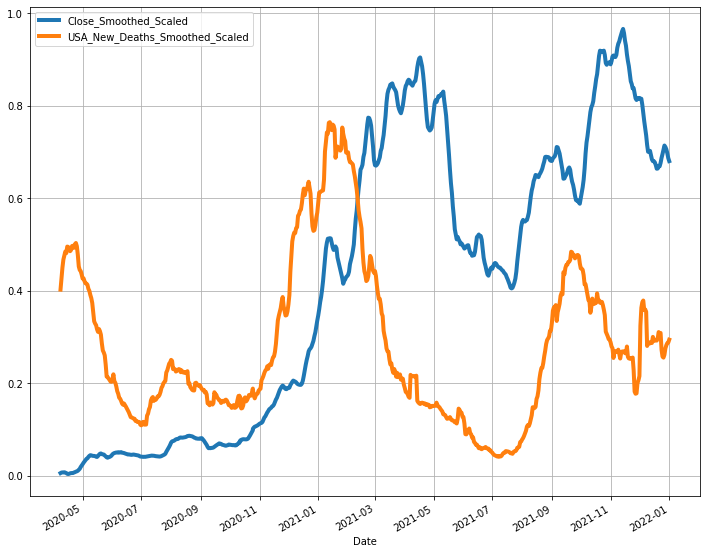

In [49]:
def draw_crypto_and_covid(data):
    # Displays COVID data in USA and cryptocurrency data on one plot
    
    def df_minmax_scaler(df):
        # Data Scalling
        index_df = df.pop('Date')
        scaler = MinMaxScaler().fit(df)
        df = pd.DataFrame(scaler.transform(df), columns = df.columns, index = index_df)
        return df

    data = df_minmax_scaler(data.copy())

    # Data smoothing and visualization
    cols_scaled = ['Close_Smoothed_Scaled', country_covid_feature + "_Smoothed_Scaled"]
    data.columns = cols_scaled
    for col in cols_scaled:
        data[col] = data[col].rolling(7).mean()
    data[cols_scaled].plot(lw=4, grid=True, figsize=(12,10))

if is_EDA_with_COVID19_data:
    draw_crypto_and_covid(data)

In [50]:
# Saving the dataset
if is_EDA_with_COVID19_data:
    df.to_csv(f'data_of_{cryptocurrency}.csv', index=False)

### 4.5. Get target, training, validation and test datasets for ML models<a class="anchor" id="4.5"></a>

[Back to Table of Contents](#0.1)

In [51]:
# Illustration of number transformations in the columns:
# "Close" -> "Close_diff" -> "Target" -> "Close_diff_pred" -> "Close_pred"
# Get target and the result of the forecasting
forecasting_days_example = 3
df_example = pd.DataFrame({'Close':[1, 2, 4, 8, 15, 25], 'Day': [0, 1, 2, 3, 4, 5]})
df_example['Close_diff'] = df_example['Close'].diff()
df_example['target'] = df_example['Close_diff'].shift(-forecasting_days_example)
df_example['target_pred'] = df_example['target'].copy()   # Ideal forecasting result
print(f'Simulation of the result of ideal forecasting the "target_pred" for {forecasting_days_example} days')
display(df_example[['Day', 'Close', 'Close_diff', 'target', 'target_pred']])

# Get inverse target
print('\nSimulation of the recovering predicted values "Close_pred" from the "target_pred"')
df_example['Close_diff_pred_shifted'] = df_example['target_pred'].shift(forecasting_days_example)

# Let's create an intermediate feature to make it easier to explain the transformation
temp_column_name = f'Close_diff_pred_shifted_with_Close'  # Intermediate feature for transformations 
df_example[temp_column_name] = df_example['Close_diff_pred_shifted'].copy()
df_example.loc[forecasting_days_example, temp_column_name] = df_example.loc[forecasting_days_example,'Close']
df_example['Close_pred'] = np.concatenate((df_example['Close'].tolist()[:forecasting_days_example], 
                                           np.cumsum(df_example[temp_column_name].values[forecasting_days_example:], dtype=float)))
df_example['Close_pred'] = df_example['Close_pred'].astype('int')
display(df_example[['Day', 'Close', 'Close_diff', 'target', 'target_pred', 'Close_diff_pred_shifted', temp_column_name, 'Close_pred']])

Simulation of the result of ideal forecasting the "target_pred" for 3 days


Day  Close  Close_diff  target  target_pred
0    0      1         NaN     4.0          4.0
1    1      2         1.0     7.0          7.0
2    2      4         2.0    10.0         10.0
3    3      8         4.0     NaN          NaN
4    4     15         7.0     NaN          NaN
5    5     25        10.0     NaN          NaN


Simulation of the recovering predicted values "Close_pred" from the "target_pred"


Day  Close  Close_diff  target  target_pred  Close_diff_pred_shifted  \
0    0      1         NaN     4.0          4.0                      NaN   
1    1      2         1.0     7.0          7.0                      NaN   
2    2      4         2.0    10.0         10.0                      NaN   
3    3      8         4.0     NaN          NaN                      4.0   
4    4     15         7.0     NaN          NaN                      7.0   
5    5     25        10.0     NaN          NaN                     10.0   

   Close_diff_pred_shifted_with_Close  Close_pred  
0                                 NaN           1  
1                                 NaN           2  
2                                 NaN           4  
3                                 8.0           8  
4                                 7.0          15  
5                                10.0          25

1. Recovery is possible if you know exactly at least one value "Close".
2. If the last N values for the time series will be in the target_test, then during the comparing with the output of other multi-features ML models needs remember that in them the target is shifted back and taken with a difference.
3. Target for Time series model is "Close". 
4. Target is for multi-factors models is "target_pred" = shifted "Close_diff".

In [52]:
def cut_data(df, y, num_start, num_end):
    # Cutting dataframe df and array or list for [num_start, num_end-1]        
    df2 = df[num_start:(num_end+1)]
    y2 = y[num_start:(num_end+1)] if y is not None else None
    return df2, y2

In [53]:
def get_target_mf(df, forecasting_days, col='Close'):
    # Get target as difference of the df[col] 
    # Returns target which is shifted for forecasting_days days in the dataframe df
    # "Close" -> "Close_diff" -> "Target" 
    col_diff = f"{col}_diff"
    df[col_diff] = df['Close'].diff()
    df['target'] = df[col_diff].shift(-forecasting_days)
    df = df.drop(columns=[col_diff]).dropna()
    
    return df

In [54]:
def get_train_valid_test_ts(df, forecasting_days, target='Close'):
    # Get training, validation and test datasets with target for Time Series models
    
    # Data prepairing
    df = df.dropna(how="any").reset_index(drop=True)
    df = df[['Date', 'Close']]
    df.columns = ['ds', 'y']        
    y = None

    # Data smoothing
#     df.index = df.ds
#     df = df.drop(columns=['ds'])
#     df['y'] = df['y'].rolling(7).mean()
#     df = df.dropna().reset_index(drop=False)
    
    N = len(df)
    train, _ = cut_data(df, y, 0, N-2*forecasting_days-1)
    valid, _ = cut_data(df, y, N-2*forecasting_days, N-forecasting_days-1)
    test, _ = cut_data(df, y, N-forecasting_days, N)
    
    # Train+valid - for optimal model training
    train_valid = pd.concat([train, valid])

    print(f'Origin dataset has {len(df)} rows and {len(df.columns)} features')
    print(f'Get training dataset with {len(train)} rows')
    print(f'Get validation dataset with {len(valid)} rows')
    print(f'Get test dataset with {len(test)} rows')
    
    return train, valid, test, train_valid

In [55]:
def get_train_valid_test_mf(df, forecasting_days, target='target'):
    # Get training, validation and test datasets with target for multi-features ML models
    
    df = df.drop(columns = ['Date']).dropna(how="any").reset_index(drop=True)
    
    # Save and drop target        
    y = df.pop(target)

    # Get starting points for the recovering "Close" from "Close_diff_shigted"
    N = len(df)
    #print(f"Total - {N}, Valid start index = {N-forecasting_days-1}, Test start index = {N-1}")
    start_points = {'valid_start_point' : df.loc[N-forecasting_days-1, 'Close'],
                    'test_start_point' : df.loc[N-1, 'Close']}

    # Standartization data
    scaler = StandardScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
    
    
    train, ytrain = cut_data(df.copy(), y, 0, N-2*forecasting_days-1)
    valid, yvalid = cut_data(df.copy(), y, N-2*forecasting_days, N-forecasting_days-1)
    test, ytest = cut_data(df.copy(), y, N-forecasting_days, N)


    # Train+valid - for optimal model training
    train_valid = pd.concat([train, valid])
    y_train_valid = pd.concat([ytrain, yvalid])

    print(f'Origin dataset has {len(df)} rows and {len(df.columns)} features')
    print(f'Get training dataset with {len(train)} rows')
    print(f'Get validation dataset with {len(valid)} rows')
    print(f'Get test dataset with {len(test)} rows')
    
    return train, ytrain, valid, yvalid, test, ytest, train_valid, y_train_valid, start_points

## 5. Model training and forecasting <a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)

This section provides examples of identifying the following models (but the list goes on):
* Facebook Prophet 
* ARIMA (and AutoARIMA)
* Linear Regression
* KNeighbors Regressor
* Support Vector Machines
* Linear SVR
* Random Forest Regressor
* Bagging Regressor
* XGB Regressor
* MLP Regressor

FB Prophet and ARIMA models have a slightly different data format, while other Machine Learning (ML) models have the same data, so it is easy to increase their number.

Classic model XGBoost have a special format, but this notebook  uses its simplified version, which work in a data format similar to the models of the Sklearn library.

Models based on neural networks (based on PyTorch or Keras) and ensembles of all these models are more effective, but this will be done later in other notebooks.

In [56]:
def calc_metrics(type_score, list_true, list_pred):
    # Calculation score with type=type_score for list_true and list_pred 
    if type_score=='r2_score':
        score = r2_score(list_true, list_pred)
    elif type_score=='rmse':
        score = mean_squared_error(list_true, list_pred, squared=False)
    elif type_score=='mape':
        score = mean_absolute_percentage_error(list_true, list_pred)
    return score

In [57]:
def result_add_metrics(result, n, y_true, y_pred):
    # Calculation and addition metrics into dataframe result[n,:]
    
    result.loc[n,'r2_score'] = calc_metrics('r2_score', y_true, y_pred)
    result.loc[n,'rmse'] = calc_metrics('rmse', y_true, y_pred)      # in coins
    result.loc[n,'mape'] = 100*calc_metrics('mape', y_true, y_pred)  # in %
    
    return result

In [58]:
# Results of all models
result = pd.DataFrame(columns = ['name_model', 'type_data', 'r2_score', 'rmse', 'mape', 'params', 'ypred'])

### 5.1. Facebook Prophet <a class="anchor" id="5.1"></a>

[Back to Table of Contents](#0.1)


The best instruction for these models and technology: https://facebook.github.io/prophet/docs/quick_start.html

You can try to use additional features to improve forecasting, but this will be done in other notebooks later.

The FB Prophet model is effective only for the values of the series themselves, and not for its differences, which are too noisy.

Analysis showed that a number of values of the series differ significantly in 2020 Years data compare and 2021 (see [Cryptocurrency : Years data comparing with AutoViz](https://www.kaggle.com/vbmokin/cryptocurrency-years-data-comparing-with-autoviz)), so to increase the accuracy of the forecast, it is proposed to model only 2021 using FB Prophet.

In [59]:
# Modeling 2021 year only
if is_Prophet:
    df2 = df[df.Date.dt.year == 2021]
    display(df2)

Date          High           Low          Open         Close  \
274 2021-01-01  29600.626953  28803.585938  28994.009766  29374.152344   
275 2021-01-02  33155.117188  29091.181641  29376.455078  32127.267578   
276 2021-01-03  34608.558594  32052.316406  32129.408203  32782.023438   
277 2021-01-04  33440.218750  28722.755859  32810.949219  31971.914062   
278 2021-01-05  34437.589844  30221.187500  31977.041016  33992.429688   
..         ...           ...           ...           ...           ...   
634 2021-12-27  51956.328125  50499.468750  50802.609375  50640.417969   
635 2021-12-28  50679.859375  47414.210938  50679.859375  47588.855469   
636 2021-12-29  48119.742188  46201.496094  47623.871094  46444.710938   
637 2021-12-30  47879.964844  46060.312500  46490.605469  47178.125000   
638 2021-12-31  48472.527344  45819.953125  47169.371094  46306.445312   

          Volume   Close_diff  index__sum_values  index__abs_energy  \
274  40730301359   372.431641              274.0            75076.0   
275  67865420765  2753.115234              275.0            75625.0   
276  78665235202   654.755859              276.0            76176.0   
277  81163475344  -810.109375              277.0            76729.0   
278  67547324782  2020.515625              278.0            77284.0   
..           ...          ...                ...                ...   
634  24324345758  -169.097656              634.0           401956.0   
635  33430376883 -3051.562500              635.0           403225.0   
636  30049226299 -1144.144531              636.0           404496.0   
637  26686491018   733.414062              637.0           405769.0   
638  36974172400  -871.679688              638.0           407044.0   

     index__median  ...  \
274          274.0  ...   
275          275.0  ...   
276          276.0  ...   
277          277.0  ...   
278          278.0  ...   
..             ...  ...   
634          634.0  ...   
635          635.0  ...   
636          636.0  ...   
637          637.0  ...   
638          638.0  ...   

     Close__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)  \
274                                       11393.633383              
275                                       12461.510518              
276                                       12715.476934              
277                                       12401.252064              
278                                       13184.968782              
..                                                 ...              
634                                       19642.383206              
635                                       18458.744476              
636                                       18014.954195              
637                                       18299.430522              
638                                       17961.323785              

     Close__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)  \
274                                        8056.515427               
275                                        8811.618591               
276                                        8991.199966               
277                                        8769.009430               
278                                        9323.180836               
..                                                 ...               
634                                       13889.262364               
635                                       13052.303391               
636                                       12738.496274               
637                                       12939.651414               
638                                       12700.573847               

     Close__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)  \
274                                        5696.816691               
275                                        6230.755259               
276                                        6357.738467         

In [60]:
# Get datasets
if is_Prophet:
    train_ts, valid_ts, test_ts, train_valid_ts = get_train_valid_test_ts(df2.copy(), forecasting_days, target='Close')
    
    if not is_anomalies:
        holidays_df = None

Origin dataset has 365 rows and 2 features
Get training dataset with 345 rows
Get validation dataset with 10 rows
Get test dataset with 10 rows


In [61]:
def prophet_modeling(result, 
                     cryptocurrency, 
                     train, 
                     test, 
                     holidays_df, 
                     period_days,
                     fourier_order_seasonality,
                     forecasting_period,
                     name_model,
                     type_data):
    # Performs FB Prophet model training for given train dataset, holidays_df and seasonality_mode
    # Performs forecasting with period by this model, visualization and error estimation
    # df - dataframe with real data in the forecasting_period
    # can be such combinations of parameters: train=train, test=valid or train=train_valid, test=test
    # Save results into dataframe result
    
    # Build Prophet model with parameters and structure 
    model = Prophet(daily_seasonality=False, 
                    weekly_seasonality=False, 
                    yearly_seasonality=False, 
                    changepoint_range=1, 
                    changepoint_prior_scale = 0.5, 
                    holidays=holidays_df, 
                    seasonality_mode = 'multiplicative'
                   )
    model.add_seasonality(name='seasonality', period=period_days, 
                          fourier_order=fourier_order_seasonality, 
                          mode = 'multiplicative', prior_scale = 0.5)
    # Training model for df
    model.fit(train)
    
    # Make a forecast
    future = model.make_future_dataframe(periods = forecasting_period)
    forecast = model.predict(future)
    
    # Draw plot of the values with forecasting data
    figure = model.plot(forecast, xlabel = 'Date', ylabel = f"{name_model} for {cryptocurrency}")
    
    # Draw plot with the components (trend and seasonalities) of the forecasts
    figure_component = model.plot_components(forecast)
    
    # Ouput the prediction for the next time on forecasted_days
    #forecast[['yhat_lower', 'yhat', 'yhat_upper']] = forecast[['yhat_lower', 'yhat', 'yhat_upper']].round(1)
    #forecast[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(forecasting_period)
    
    # Forecasting data by the model
    ypred = forecast['yhat'][-forecasting_period:]
    #print(ypred)
    # Save results
    n = len(result)
    result.loc[n,'name_model'] = f"Prophet_{name_model}"
    result.loc[n,'type_data'] = type_data
    result.at[n,'params'] = [period_days]+[fourier_order_seasonality]
    result.at[n,'ypred'] = ypred
    #result = result_add_metrics(result, n, test['y'], y_pred)
    
    return result, ypred

**TASK :** It is proposed to experiment with models parameters

Initial log joint probability = -8.09458
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       802.544     0.0773449       242.418           1           1      110   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       827.886     0.0255413       225.901           1           1      220   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       845.941     0.0230059       35.3192           1           1      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       849.472    0.00164149       19.8214           1           1      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       858.093    0.00133409       93.4874      0.4271      0.4271      561   
    Iter      log prob        ||dx||      ||grad||       alpha  

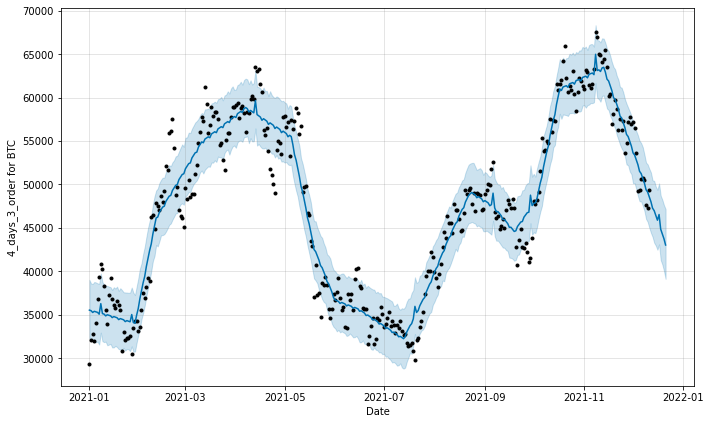

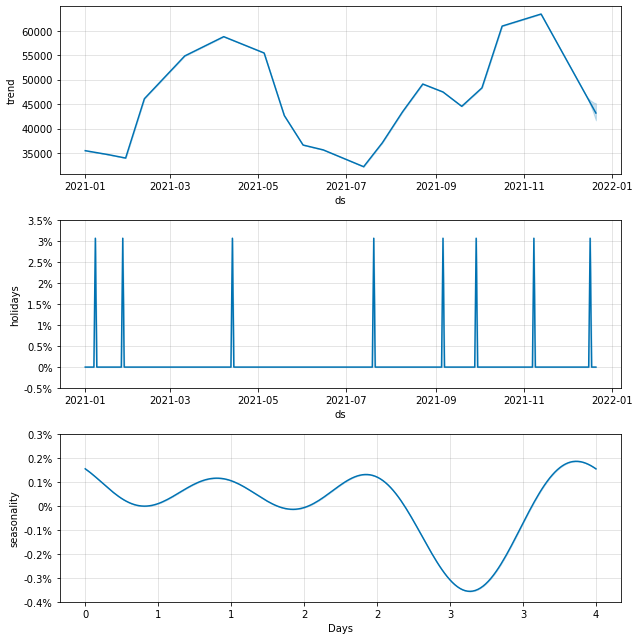

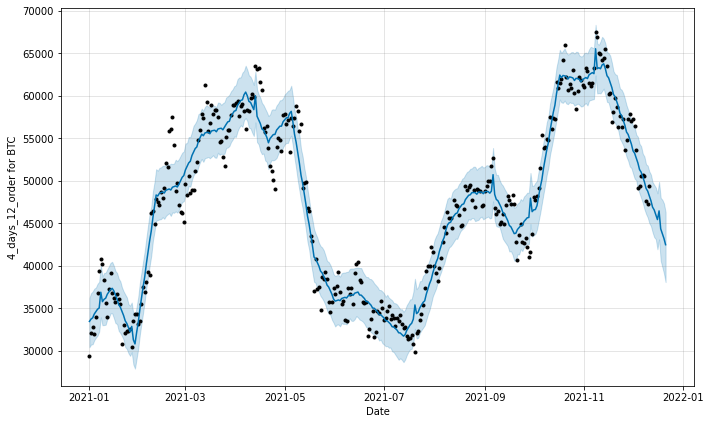

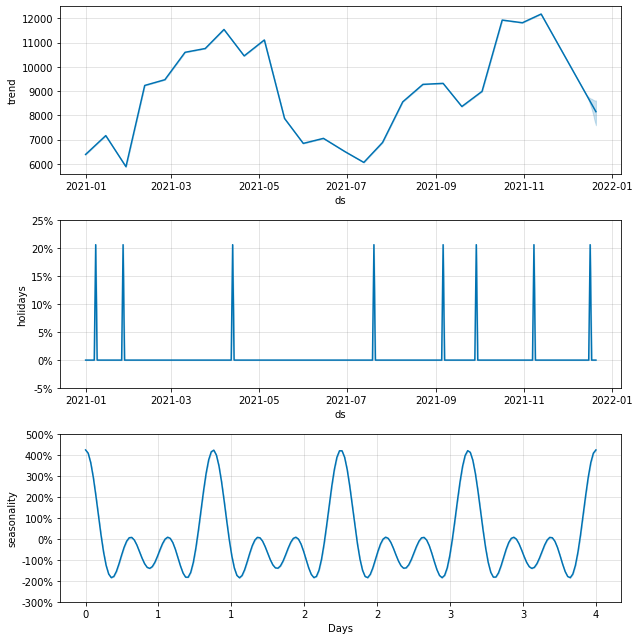

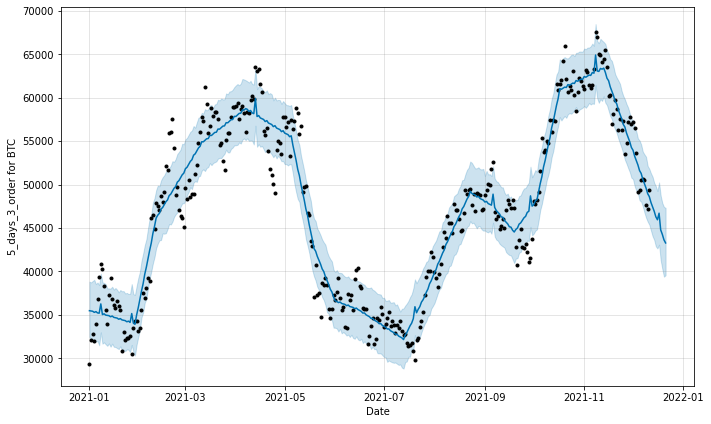

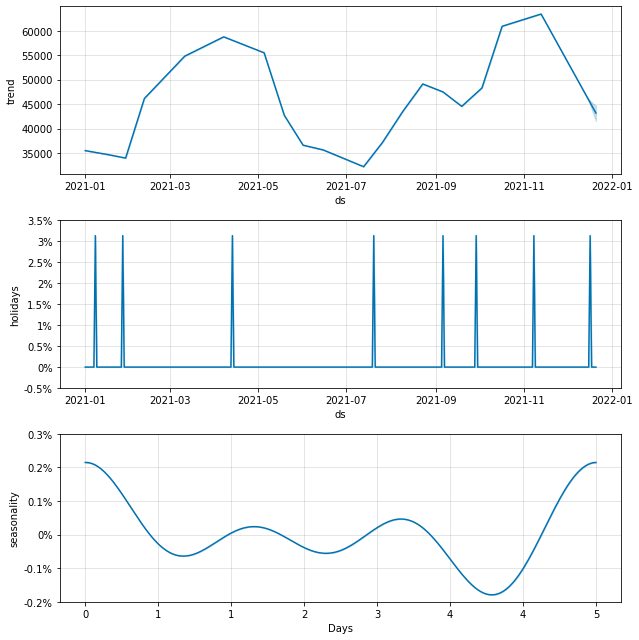

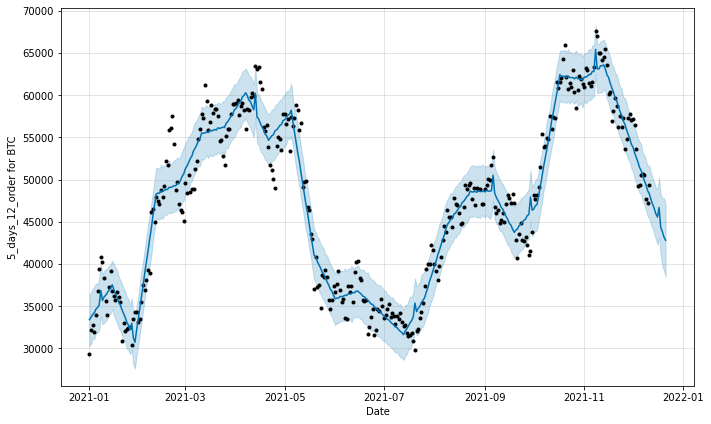

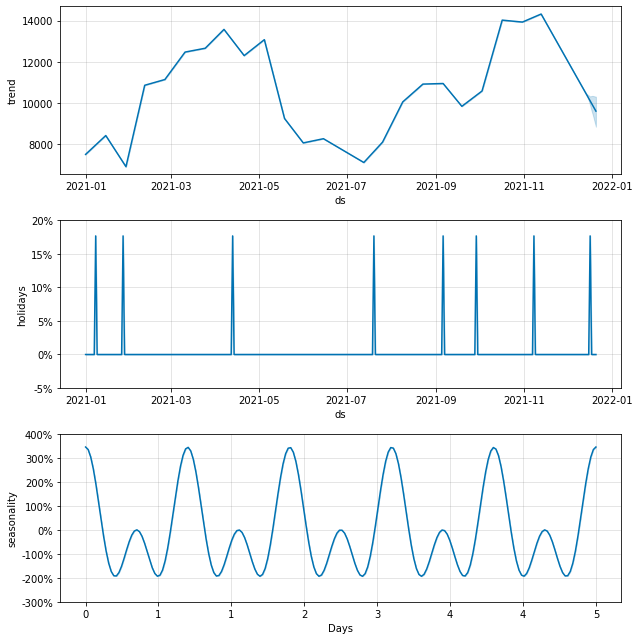

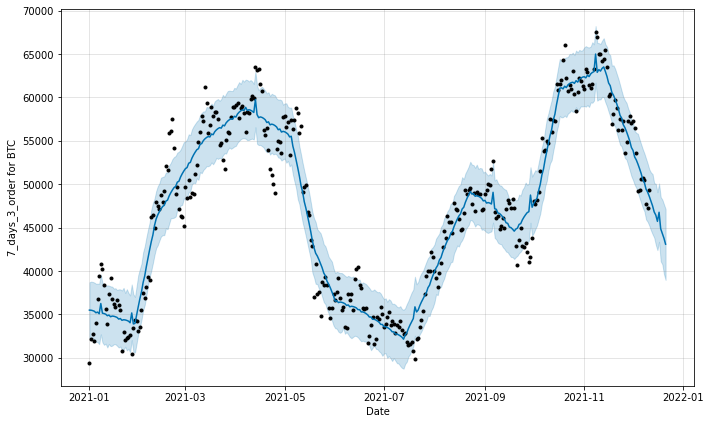

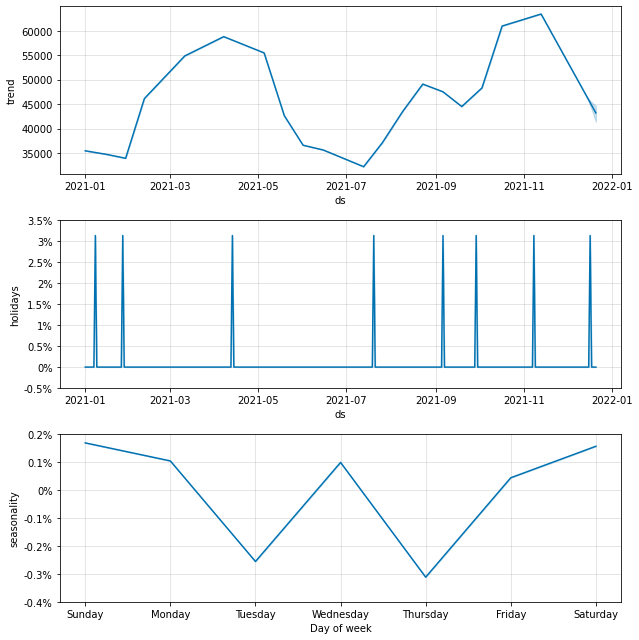

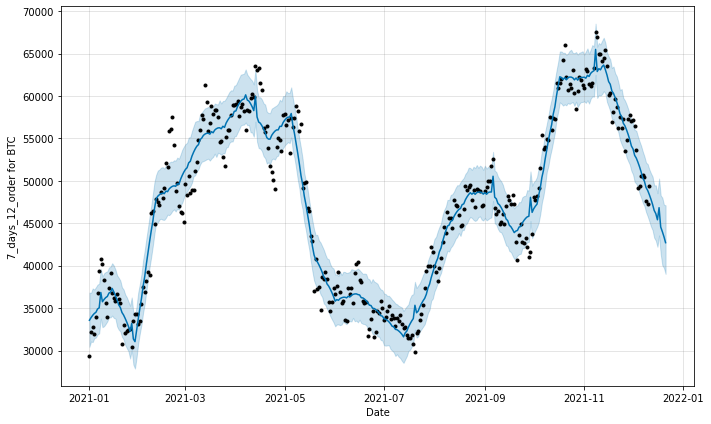

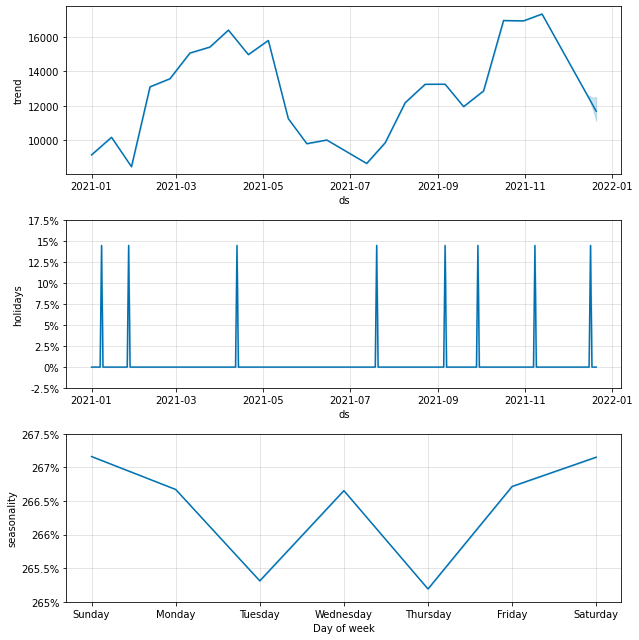

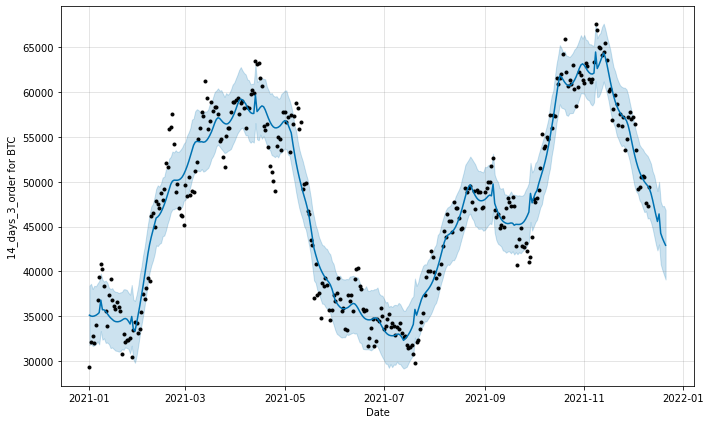

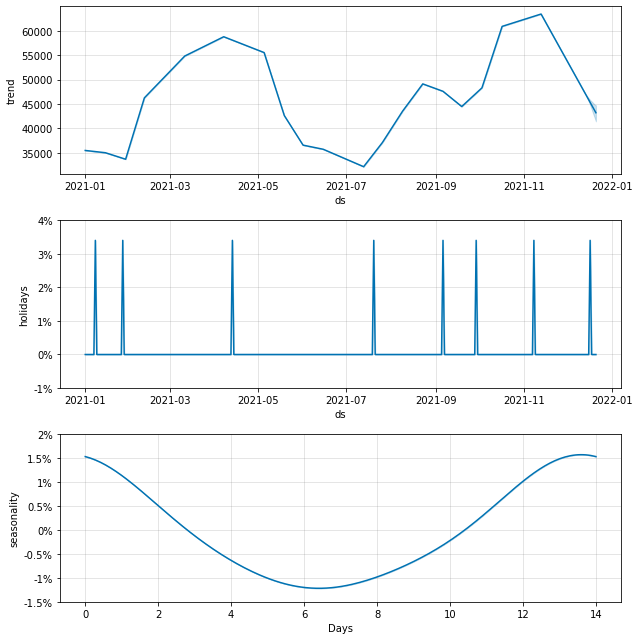

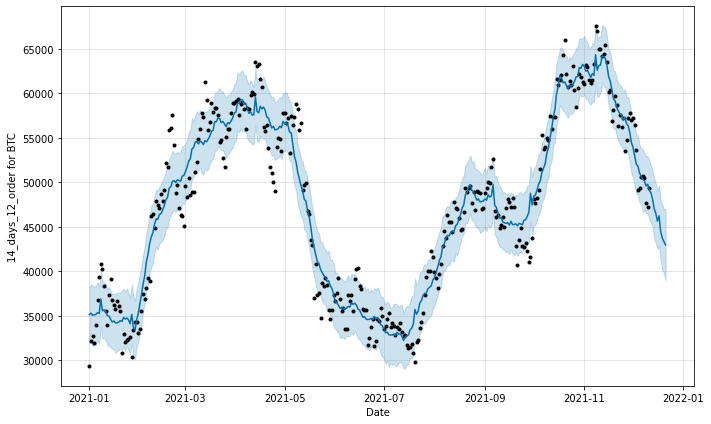

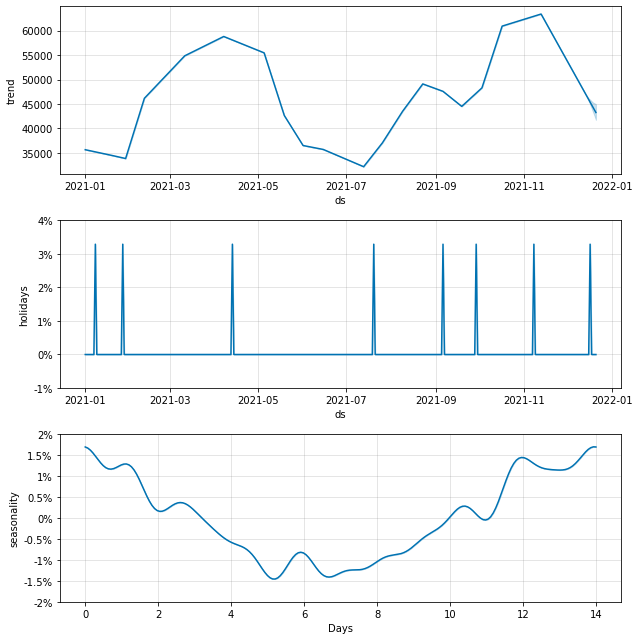

In [62]:
%%time
# Models tuning
if is_Prophet:
    for period_days in [4, 5, 7, 14]:
        for fourier_order_seasonality in [3, 12]:
            result, _ = prophet_modeling(result, 
                                         cryptocurrency, 
                                         train_ts, 
                                         valid_ts, 
                                         holidays_df, 
                                         period_days,
                                         fourier_order_seasonality,
                                         forecasting_days,
                                         f'{period_days}_days_{fourier_order_seasonality}_order',
                                         'valid')

### 5.2. ARIMA <a class="anchor" id="5.2"></a>

[Back to Table of Contents](#0.1)

This information from the good notebook [ARIMA Model for Time Series Forecasting](https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting)

ARIMA stands for Autoregressive Integrated Moving Average Model. It belongs to a class of models that explains a given time series based on its own past values -i.e.- its own lags and the lagged forecast errors. The equation can be used to forecast future values. Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.
So, ARIMA, short for AutoRegressive Integrated Moving Average, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.
ARIMA Models are specified by three order parameters: (p, d, q),

where,

- p is the order of the AR term

- d is the number of differencing required to make the time series stationary

- q is the order of the MA term


- AR(p) Autoregression – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.

- I(d) Integration – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.

- MA(q) Moving Average – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

In [63]:
# Get datasets
if is_ARIMA:
    train_ts, valid_ts, test_ts, train_valid_ts = get_train_valid_test_ts(df2.copy(), forecasting_days, target='Close')

Origin dataset has 365 rows and 2 features
Get training dataset with 345 rows
Get validation dataset with 10 rows
Get test dataset with 10 rows


#### **5.2.1 How to find the order of differencing (d) in ARIMA model**  <a class="anchor" id="5.2.1"></a>

[Table of Contents](#0.1)

This information from the good notebook [ARIMA Model for Time Series Forecasting](https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting)

- As stated earlier, the purpose of differencing is to make the time series stationary. But we should be careful to not over-difference the series. An over differenced series may still be stationary, which in turn will affect the model parameters.


- So we should determine the right order of differencing. The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.


- If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.


- If we can’t really decide between two orders of differencing, then we go with the order that gives the least standard deviation in the differenced series.


- Now, we will explain these concepts with the help of an example as follows:


- First, I will check if the series is stationary using the **Augmented Dickey Fuller test (ADF Test)**, from the statsmodels package. The reason being is that we need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.


- The null hypothesis (Ho) of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary.


- So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

- **A similar analysis has already been made in the paragraph "3.4. Stationarity check" above**

In [64]:
def acf_pacf_draw(df, lag_num=40, acf=True, pacf=True, title="", ylim=1):
    # Draw plots named title with ACF and PACF for dataframe df
    
    num_plots = 1+int(acf)+int(pacf)
    fig, ax = plt.subplots(1,num_plots,figsize=(12,6))
    # 'Original Series'
    ax[0].plot(df.values.squeeze())
    
    if acf:
        # ACF drawing
        plot_acf(df.values.squeeze(), lags=lag_num, ax=ax[1])
        ax[1].set(ylim=(-ylim, ylim))
        
        if pacf:
            # PACF drawing
            plot_pacf(df.values.squeeze(), lags=lag_num, ax=ax[2])
            ax[2].set(ylim=(-ylim, ylim))
        
    elif pacf:
        # PACF drawing
        plot_pacf(df.values.squeeze(), lags=lag_num, ax=ax[1])
        ax[1].set(ylim=(-ylim, ylim))

    fig.suptitle(title)
    plt.show()

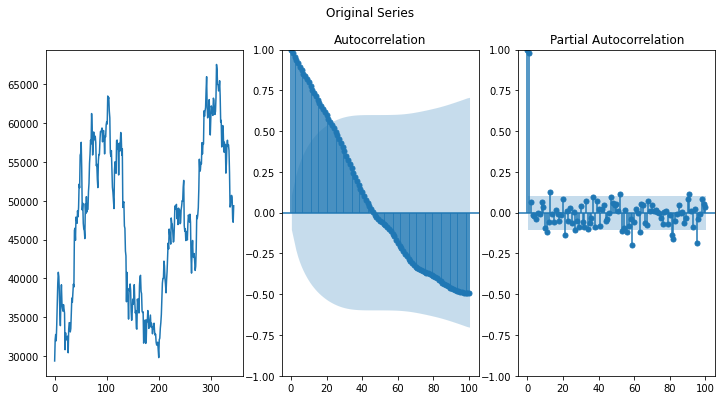

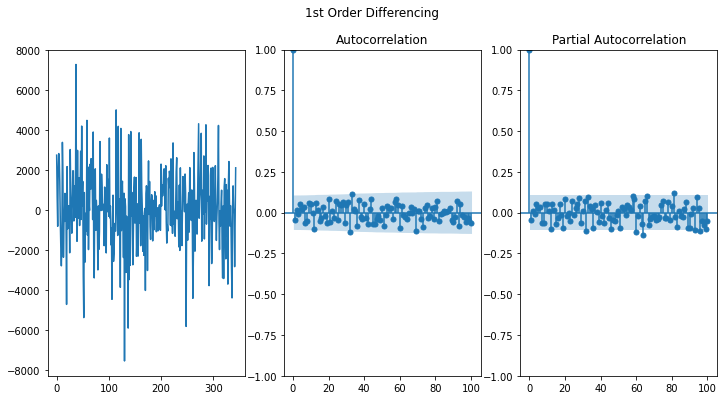

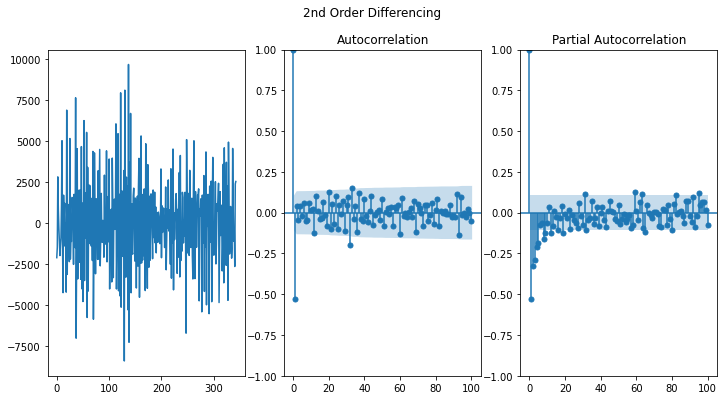

In [65]:
if is_ARIMA:
    # ACF and PACF
    lag_num = 100
    acf_pacf_draw(train_ts['y'], lag_num, True, True, 'Original Series')
    acf_pacf_draw(train_ts['y'].diff().dropna(), lag_num, True, True, '1st Order Differencing')
    acf_pacf_draw(train_ts['y'].diff().diff().dropna(), lag_num, True, True, '2nd Order Differencing')

- For the above data, we can see that the time series reaches stationarity with first orders of differencing. Although, it value may be higher, as can be seen from the larger values of the lag.

In [66]:
d = 1

#### **5.2.2. How to find the order of the AR term (p)** <a class="anchor" id="5.2.2"></a>

[Table of Contents](#0.1)

This information from the good notebook [ARIMA Model for Time Series Forecasting](https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting)

- The next step is to identify if the model needs any AR terms. We will find out the required number of AR terms by inspecting the **Partial Autocorrelation (PACF) plot**.


- **Partial autocorrelation** can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. This way, we will know if that lag is needed in the AR term or not.


- Partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y.


$$Yt = \alpha0 + \alpha1 Y{t-1} + \alpha2 Y{t-2} + \alpha3 Y{t-3}$$


- That is, suppose, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient $\alpha_3$ of Y_t-3 in the above equation.


- Now, we should find the number of AR terms. Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.



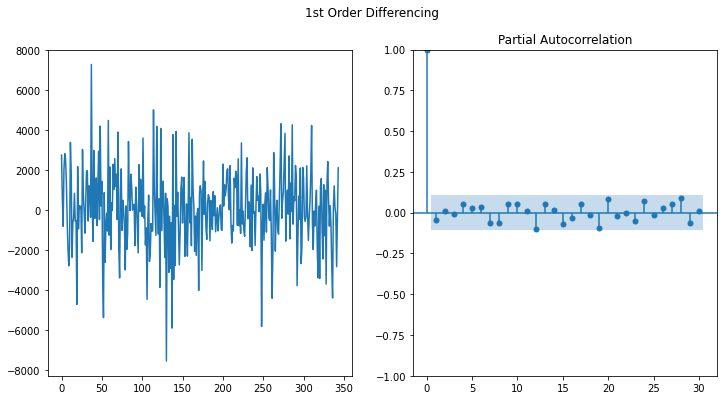

In [67]:
# PACF drawing
if is_ARIMA:
    acf_pacf_draw(train_ts['y'].diff().dropna(), 30, False, True, '1st Order Differencing', 1)

- We can see that the PACF lag 0 is quite significant since it is well above the significance line. So, we will fix the value of p as 1. Although, it value may be higher, as can be seen from the larger values of the lag.

In [68]:
p = 0

#### **5.2.3. How to find the order of the MA term (q)** <a class="anchor" id="5.2.3"></a>

[Table of Contents](#0.1)

This information from the good notebook [ARIMA Model for Time Series Forecasting](https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting)

- Just like how we looked at the PACF plot for the number of AR terms, we will look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.


- The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.


- Let’s see the autocorrelation plot of the differenced series.

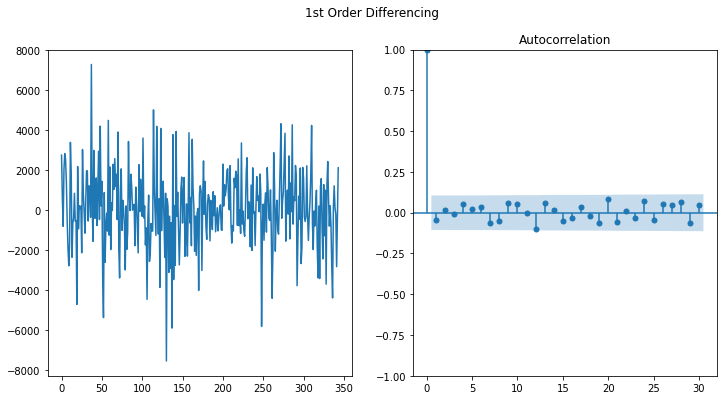

In [69]:
# ACF drawing
if is_ARIMA:
    acf_pacf_draw(train_ts['y'].diff().dropna(), 30, True, False, '1st Order Differencing', 1)

- We can see that couple of lags are well above the significance line. So, we will fix q as 0. If there is any doubt, we will go with the simpler model that sufficiently explains the Y.

In [70]:
q = 0

#### **5.2.4. How to build the ARIMA Model with manually defined parameters** <a class="anchor" id="5.2.4"></a>


[Table of Contents](#0.1)


Now, we have determined the values of p, d and q. We have everything needed to fit the ARIMA model. We will use the ARIMA() implementation in the statsmodels package.

In [71]:
def arima_fit(df, col, order=(1,1,1)):
    # ARIMA model fitting for series df[col]
    
    model = sm.tsa.arima.ARIMA(df[col].values.squeeze(), order=order)
    model = model.fit()
    return model

In [72]:
if is_ARIMA:
    # ARIMA Model tuning
    model = arima_fit(train_ts, 'y', order=(p,d,q))
    print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  345
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3090.843
Date:                Sun, 19 Jun 2022   AIC                           6183.686
Time:                        13:11:38   BIC                           6187.527
Sample:                             0   HQIC                          6185.216
                                - 345                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       3.72e+06   2.24e+05     16.620      0.000    3.28e+06    4.16e+06
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):                22.63
Prob(Q):                              0.38   Pr

- The model summary provides lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

- The model AIC has slightly reduced, which is good. The p-values  in ‘P>|z|’ column is highly significant (<< 0.05).

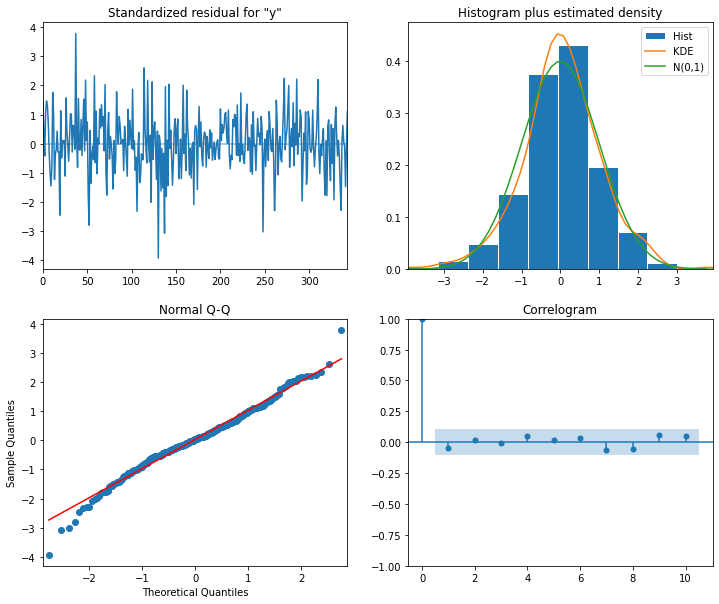

In [73]:
if is_ARIMA:
    # ARIMA model diagnostics
    fig = model.plot_diagnostics(figsize=(12,10))
    plt.show()

#### **Interpretation of plots in plot diagnostics**

This information from the good notebook [ARIMA Model for Time Series Forecasting](https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting)

**Standardized residual**: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.


**Histogram**: The density plot suggest normal distribution with mean slighlty shifted towards right.


**Theoretical Quantiles**: Mostly the dots fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.


**Correlogram**: The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model. So we will need to look for more X’s (predictors) to the model.


Overall, the model seems to be a good fit. Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

In [74]:
def get_residual_errors(model):
    # Calculation and drawing the plot residual errors for ARIMA model
    residuals = pd.DataFrame(model.resid)
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    residuals.plot(title="Residuals", ax=ax[0])
    residuals.plot(kind='kde', title='Density', ax=ax[1])
    plt.show()

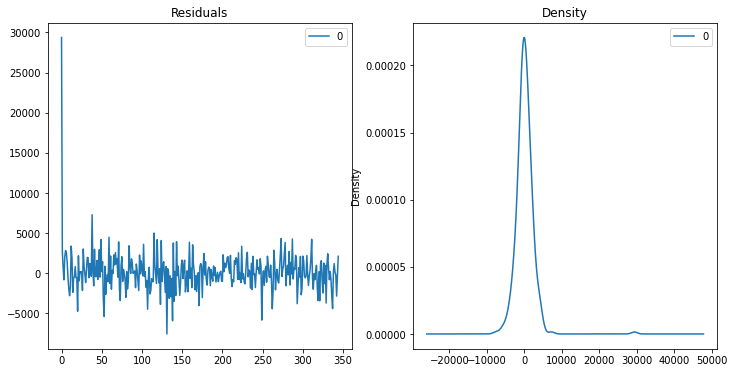

In [75]:
if is_ARIMA:
    # Plot residual errors
    get_residual_errors(model)

- The residual errors seem fine with near zero mean and uniform variance.

In [76]:
def arima_forecasting(result, model, params, name_model, df, type_data):
    # Data df (validation or test) forecasting on the num days by the model 
    # with params and save metrics to result 
    
    ypred = model.forecast(steps=len(df))
    
    n = len(result)
    result.loc[n,'name_model'] = name_model
    result.loc[n,'type_data'] = type_data
    result.at[n,'params'] = params
    result.at[n,'ypred'] = ypred
    #result = result_add_metrics(result, n, df['y'], y_pred)
    
    return result

In [77]:
if is_ARIMA:
    # Valid forecasting and save result
    result = arima_forecasting(result, model, [p]+[d]+[q], 'ARIMA_manual', valid_ts, 'valid')

#### **5.2.5. How to build the ARIMA automatically** <a class="anchor" id="5.2.5"></a>

[Table of Contents](#0.1)

You can try to use additional features in the parameter X of pm.auto_arima to improve forecasting, but this will be done in other notebooks later.

In [78]:
%%time
if is_ARIMA:
    # Automatic tuning of the ARIMA model 
    model_auto = pm.auto_arima(train_ts['y'].values, 
                               start_p=4,        # start p
                               start_q=4,        # start q
                               test='adf',       # use adftest to find optimal 'd'
                               max_p=5, max_q=5, # maximum p and q
                               m=1,              # frequency of series (1 - No Seasonality)
                               d=None,           # let model determine 'd'
                               seasonal=False,   # No Seasonality
                               start_P=0,        
                               D=0, 
                               start_Q=0,
                               trace=True,
                               error_action='ignore',  
                               suppress_warnings=False, 
                               stepwise=True     # use the stepwise algorithm outlined in Hyndman and Khandakar (2008) 
                                                 # to identify the optimal model parameters. 
                                                 # The stepwise algorithm can be significantly faster than fitting all 
                                                 # hyper-parameter combinations and is less likely to over-fit the model
                              )

    print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=6196.011, Time=1.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6185.373, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6187.379, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6187.375, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6183.686, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6189.382, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.976 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  345
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3090.843
Date:                Sun, 19 Jun 2022   AIC                           6183.686
Time:                        13:11:51   BIC                           6187.527
Sample:                             0   HQIC                          6185.216
          

In [79]:
if is_ARIMA:
    # Get orders of the best model from AutoARIMA
    arima_orders_best = list(model_auto.get_params().get('order'))
    print(f"Optimal parameters are {arima_orders_best}")
    model_auto = arima_fit(train_ts, 'y', order=(arima_orders_best[0],arima_orders_best[1],arima_orders_best[2]))

Optimal parameters are [0, 1, 0]


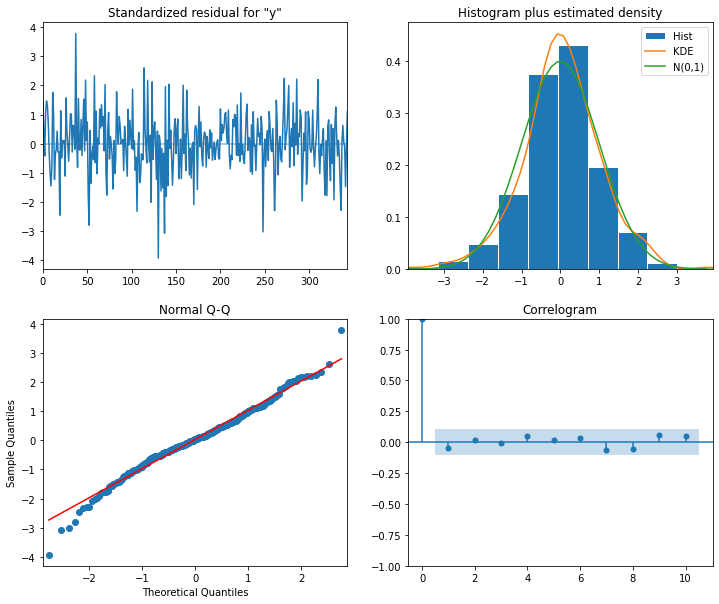

In [80]:
if is_ARIMA:
    # Best model from AutoARIMA
    fig = model_auto.plot_diagnostics(figsize=(12,10))
    plt.show()

- The residual errors seem fine with near zero mean and uniform variance.

In [81]:
if is_ARIMA:
    # Valid forecasting and save result
    result = arima_forecasting(result, model_auto, arima_orders_best, 'ARIMA_auto', valid_ts, 'valid')

### 5.3. Other ML models (Multi-factors models) <a class="anchor" id="5.3"></a>

[Back to Table of Contents](#0.1)

This section provides examples of identifying the following models (but the list goes on):
* Linear Regression
* KNeighbors Regressor
* Support Vector Machines
* Linear SVR
* Random Forest Regressor
* Bagging Regressor
* XGB Regressor
* MLP Regressor

Classic model XGBoost have a special format, but this notebook  uses its simplified version, which work in a data format similar to the models of the Sklearn library.

Models based on neural networks (based on PyTorch or Keras) and ensembles of all these models are more effective, but this will be done later in other notebooks.

**This section - from the notebook [Crypto - BTC : 7 prediction models](https://www.kaggle.com/code/vbmokin/crypto-btc-7-prediction-models)**

In [82]:
# Get datasets
if is_other_ML:
    df2 = get_target_mf(df2, forecasting_days, col='Close')
    train_mf, ytrain_mf, valid_mf, yvalid_mf, test_mf, ytest_mf, train_valid_mf, y_train_valid_mf, starting_point = \
                                    get_train_valid_test_mf(df2.copy(), forecasting_days, target='target')

Origin dataset has 355 rows and 60 features
Get training dataset with 335 rows
Get validation dataset with 10 rows
Get test dataset with 10 rows


#### **5.3.1. Set parameters for many models** <a class="anchor" id="5.3.1"></a>

[Table of Contents](#0.1)

**TASK:** Try adding more models or changing the settings of these models.

In [83]:
if is_other_ML:
    # Set parameters of models
    models = pd.DataFrame(columns = ['name', 'model', 'param_grid'])

    # Linear Regression
    n = len(models)
    models.loc[n, 'name'] = 'Linear Regression'
    models.at[n, 'model'] = LinearRegression()
    models.at[n, 'param_grid'] = {'fit_intercept' : [True, False]}


    # KNeighbors Regressor
    n = len(models)
    models.loc[n, 'name'] = 'KNeighbors Regressor'
    models.at[n, 'model'] = KNeighborsRegressor()
    models.at[n, 'param_grid'] = {'n_neighbors': [3, 5, 10, 20, 30],
                                  'leaf_size': [10, 20, 30]
                                 }

    # Support Vector Machines
    n = len(models)
    models.loc[n, 'name'] = 'Support Vector Machines'
    models.at[n, 'model'] = SVR()
    models.at[n, 'param_grid'] = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                  'C': np.linspace(1, 15, 15),
                                  'tol': [1e-3, 1e-4]
                                 }

    # Linear SVC
    n = len(models)
    models.loc[n, 'name'] = 'Linear SVR'
    models.at[n, 'model'] = LinearSVR()
    models.at[n, 'param_grid'] = {'C': np.linspace(1, 15, 15)}


    # Random Forest Classifier
    n = len(models)
    models.loc[n, 'name'] = 'Random Forest Regressor'
    models.at[n, 'model'] = RandomForestRegressor()
    models.at[n, 'param_grid'] = {'n_estimators': [40, 50, 60, 80], 
                                  'min_samples_split': [30, 40, 50, 60], 
                                  'min_samples_leaf': [10, 12, 15, 20, 50],
                                  'max_features': ['auto'], 
                                  'max_depth': [3, 4, 5, 6]                   
                                 }

    # Bagging Classifier
    n = len(models)
    models.loc[n, 'name'] = 'Bagging Regressor'
    models.at[n, 'model'] = BaggingRegressor()
    models.at[n, 'param_grid'] = {'max_features': np.linspace(0.05, 0.8, 1),
                                  'n_estimators': [3, 4, 5, 6],
                                  'warm_start' : [False]
                                 }

    # XGB Classifier
    n = len(models)
    models.loc[n, 'name'] = 'XGB Regressor'
    models.at[n, 'model'] = xgb.XGBRegressor()
    models.at[n, 'param_grid'] = {'n_estimators': [50, 70, 90], 
                                  'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                  'max_depth': [3, 4, 5]
                                 }

    # MLP Classifier
    n = len(models)
    models.loc[n, 'name'] = 'MLP Regressor'
    models.at[n, 'model'] = MLPRegressor()
    models.at[n, 'param_grid'] = {'hidden_layer_sizes': [i for i in range(2,5)],
                                  'solver': ['lbfgs', 'sgd'],
                                  'learning_rate': ['adaptive'],
                                  'learning_rate_init': [0.001, 0.01],
                                  'max_iter': [1000]
                                 }
models

name                                              model  \
0        Linear Regression                                 LinearRegression()   
1     KNeighbors Regressor                              KNeighborsRegressor()   
2  Support Vector Machines                                              SVR()   
3               Linear SVR                                        LinearSVR()   
4  Random Forest Regressor                            RandomForestRegressor()   
5        Bagging Regressor                                 BaggingRegressor()   
6            XGB Regressor  XGBRegressor(base_score=None, booster=None, ca...   
7            MLP Regressor                                     MLPRegressor()   

                                          param_grid  
0                   {'fit_intercept': [True, False]}  
1  {'n_neighbors': [3, 5, 10, 20, 30], 'leaf_size...  
2  {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'...  
3  {'C': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...  
4  {'n_estimators': [40, 50, 60, 80], 'min_sample...  
5  {'max_features': [0.05], 'n_estimators': [3, 4...  
6  {'n_estimators': [50, 70, 90], 'learning_rate'...  
7  {'hidden_layer_sizes': [2, 3, 4], 'solver': ['...

#### **5.3.2. Models training and forecasting** <a class="anchor" id="5.3.2"></a>

[Table of Contents](#0.1)

In [84]:
def model_prediction(result, models, train_features, valid_features, train_labels, valid_labels):    
    # Models training and data prediction for all models from DataFrame models
    # Saving results for validation dataset into dataframe result
    
    def calc_add_score(res, n, type_score, list_true, list_pred, feature_end):
        # Calculation score with type=type_score for list_true and list_pred 
        # Adding score into res.loc[n,...]
        res.loc[i, type_score + feature_end] = calc_metrics(type_score, list_true, list_pred)
        return res
    
    # Results
    model_all = []

    for i in range(len(models)):
        # Training
        print(f"Tuning model '{models.loc[i, 'name']}'")
        model = GridSearchCV(models.at[i, 'model'], models.at[i, 'param_grid'])
        model.fit(train_features, train_labels)
        model_all.append(model)
        print(f"Best parameters: {model.best_params_}\n")
        
        # Prediction
        ypred = model.predict(valid_features)
        
        # Scoring and saving results into the main dataframe result
        n = len(result)
        result.loc[n,'name_model'] = f"{models.loc[i, 'name']}"
        result.loc[n,'type_data'] = "valid"
        result.at[n,'params'] = model.best_params_
        result.at[n,'ypred'] = ypred
        #result = result_add_metrics(result, n, valid_labels, valid_pred)
        
    return result, model_all

In [85]:
%%time
if is_other_ML:
    # Models tuning and the forecasting
    result, model_all = model_prediction(result, models, train_mf, valid_mf, ytrain_mf, yvalid_mf)

Tuning model 'Linear Regression'
Best parameters: {'fit_intercept': False}

Tuning model 'KNeighbors Regressor'
Best parameters: {'leaf_size': 10, 'n_neighbors': 20}

Tuning model 'Support Vector Machines'
Best parameters: {'C': 13.0, 'kernel': 'linear', 'tol': 0.0001}

Tuning model 'Linear SVR'
Best parameters: {'C': 14.0}

Tuning model 'Random Forest Regressor'
Best parameters: {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 50, 'min_samples_split': 30, 'n_estimators': 80}

Tuning model 'Bagging Regressor'
Best parameters: {'max_features': 0.05, 'n_estimators': 3, 'warm_start': False}

Tuning model 'XGB Regressor'
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

Tuning model 'MLP Regressor'
Best parameters: {'hidden_layer_sizes': 2, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 1000, 'solver': 'lbfgs'}

CPU times: user 8min 42s, sys: 4.74 s, total: 8min 46s
Wall time: 6min 6s


### 5.4. Choosing the main optimal model and forecasting <a class="anchor" id="5.4"></a>

[Back to Table of Contents](#0.1)

In [86]:
def recovery_prediction(y, starting_point):
    # Recovering prediction of multi-factors model for shifted col_diff to col in the dataframe df
    # y has type np.array
    # starting_point is dictionary with start values for the recovering data
    # Returns y (np.array) with recovering data
    
    return np.insert(y, 0, starting_point).cumsum()[1:]

In [87]:
def result_recover_and_metrics(result, df_ts, type_data, start_points):
    # Recovering prediction: from shifted_Close_diff to Close
    # Calculation metrics for recovering ypred forecasting for all models in result
    # ypred real is from df_ts['y']
    # start points value for the recovering is from dictionary start_points
    # type_data = 'valid' or 'test'

    for i in range(len(result)):
        if (result.loc[i, 'type_data']==type_data) and (result.loc[i, 'mape'] is np.nan):
            ypred = result.loc[i, 'ypred']

            # Recovering ypred for multi-factors models
            if not (str(result.loc[i, 'type_model']) in ['Prophet', 'ARIMA']):
                # Multi-factors model
                # Get start points value for the recovering
                start_point_value = start_points['valid_start_point'] if type_data=='valid' else start_points['test_start_point']
                # Recovering prediction
                ypred = recovery_prediction(ypred, start_point_value)            

            # Calculation metrics
            result = result_add_metrics(result, i, df_ts['y'], ypred)
    
    return result

In [88]:
# Dispay and save all results for validation dataset
if len(result) > 0:
    
    # Get type of each model
    result['type_model'] = result['name_model'].str.split('_').str[0]

    # Calculation metrics for recovering prediction ypred for validation dataset by all models 
    result = result_recover_and_metrics(result, valid_ts, 'valid', starting_point)
    display(result[['name_model', 'type_data', 'r2_score', 'rmse', 'mape']].sort_values(by=['type_data', 'mape', 'rmse'], ascending=True))
    
    # Save results
    num_models = len(result[result['type_data']=='valid']['name_model'].unique().tolist())
    print(f"Number of models built - {num_models}")
    result.to_csv(f'result_of_{num_models}_models_for_forecasting_days_{forecasting_days}.csv')
else: 
    print('There are no tuned models!')

name_model type_data   r2_score         rmse      mape
17             MLP Regressor     valid  -0.198116  1351.685712  2.446971
14   Random Forest Regressor     valid  -1.346753  1891.733477  3.600522
16             XGB Regressor     valid  -1.681957  2022.330814  3.910245
8               ARIMA_manual     valid  -2.134046  2186.144947  4.155419
9                 ARIMA_auto     valid  -2.134046  2186.144947  4.155419
0     Prophet_4_days_3_order     valid  -3.500327    2619.6803  4.378274
4     Prophet_7_days_3_order     valid  -3.484646  2615.112198  4.434403
2     Prophet_5_days_3_order     valid   -3.45194  2605.558869  4.459963
7   Prophet_14_days_12_order     valid  -3.980621  2755.929009  4.672814
11      KNeighbors Regressor     valid  -2.878011  2431.816508  4.742777
5    Prophet_7_days_12_order     valid  -4.348041  2855.772577  4.823949
6    Prophet_14_days_3_order     valid  -4.210631  2818.846522  4.854834
3    Prophet_5_days_12_order     valid  -4.572252  2915.020682  4.903246
1    Prophet_4_days_12_order     valid  -4.853486  2987.676422  4.904373
13                Linear SVR     valid  -3.263582  2549.843676  4.947899
12   Support Vector Machines     valid  -3.347282  2574.750635  5.000937
10         Linear Regression     valid  -7.766195  3656.215868  7.098678
15         Bagging Regressor     valid -11.517699   4369.06509   7.56984

Number of models built - 18


In [89]:
def get_model_opt(name_model, params):
    # Model tuning for the name_model
    
    print(name_model)
    if name_model=='Linear Regression':
        model = LinearRegression(**params)
        
    elif name_model=='KNeighbors Regressor':
        model = KNeighborsRegressor(**params)
        
    elif name_model=='Support Vector Machines':
        model = SVR(**params)
        
    elif name_model=='Linear SVR':
        model = LinearSVR(**params)
        
    elif name_model=='Random Forest Regressor':
        model = RandomForestRegressor(**params)
        
    elif name_model=='Bagging Regressor':
        model = BaggingRegressor(**params)
    
    elif name_model=='MLP Regressor':
        model = MLPRegressor(**params)
        
    elif name_model=='XGB Regressor':
        model = xgb.XGBRegressor(**params)
        
    else: model = None
        
    return model

In [90]:
def get_params_optimal_model(result, main_metrics):
    # Get parameters of the optimal model from dataframe result by main_metrics

    # Set the data type to float (just in case)
    result[main_metrics] = result[main_metrics].astype('float')
    
    # Choose the optimal model
    opt_result = result[result['type_data']=='valid'].reset_index(drop=True)
    if main_metrics=='r2_score':
        opt_model = opt_result.nlargest(1, main_metrics)
    else:
        # 'mape' or 'rmse'
        opt_model = opt_result.nsmallest(1, main_metrics)
    display(opt_model[['name_model', 'r2_score', 'rmse', 'mape', 'params']])

    # Get parameters of the optimal model
    opt_name_model = opt_model['name_model'].tolist()[0]
    opt_type_model = opt_model['type_model'].tolist()[0]
    opt_params_model = opt_model['params'].tolist()[0]
    print(f'Optimal model by metrics "{main_metrics}" is "{opt_name_model}" with type "{opt_type_model}" parameters {opt_params_model}')
    
    return opt_name_model, opt_type_model, opt_params_model

In [91]:
def model_training_forecasting(result, df, y, test, ytest,  
                               name_model, type_model, params, type_test='1'):
    # Model training for df and y
    # Forecasting ypred
    # type_model = 'Prophet' or "ARIMA" or 'Other ML'
    # type_test = '1' (with find optimal parameters by GridSearchCV) 
    # type_test = '2' (with optimal parameters - without GridSearchCV)
    # return params and metrics in the dataframe result
    
    if type_model=='Prophet':    
        season_days_optimal = params[0]
        fourier_order_seasonality_optimal = params[1]
        model_opt = None
        _, ypred = prophet_modeling(result, 
                                    cryptocurrency, 
                                    df, 
                                    test, 
                                    holidays_df, 
                                    season_days_optimal,
                                    fourier_order_seasonality_optimal,
                                    forecasting_days,
                                    f'{type_model}_optimal',
                                    'test')        
    elif type_model=='ARIMA':
        season_days_optimal = params[0]
        fourier_order_seasonality_optimal = params[1]        
        model_opt = None
        
        # Training ARIMA optimal model for training+valid dataset
        df['y'] = y
        model_opt = arima_fit(df, 'y', order=(params[0],params[1],params[2]))        

        # Model diagnostics
        fig = model_opt.plot_diagnostics(figsize=(12,10))
        plt.show()

        # Plot residual errors
        get_residual_errors(model_opt)

        # Test forecasting and save result
        ypred = model_opt.forecast(steps=len(test))        

    else:
        # Other ML model
        # Training ML optimal model for training+valid dataset
        print(f"Tuning model '{name_model}'")
        models_opt_number = models[models['name']==name_model].index.tolist()[0]
        #print(f"Model - {models.at[models_opt_number,'model']} with parameters {params}")
        if type_test=='1':
            model_opt = GridSearchCV(models.at[models_opt_number,'model'], models.at[models_opt_number,'param_grid'])
        else:
            # type_test=='2'
            model_opt = get_model_opt(models.at[models_opt_number,'name'], params)
        model_opt.fit(df, y)
        
        # Forecasting
        ypred = model_opt.predict(test)

        
    # Scoring and saving results into the dataframe result
    n = len(result)-1
    result.loc[n,'name_model'] = f"{type_model}_optimal"
    result.loc[n,'type_data'] = "test"
    result.loc[n,'type_model'] = type_model
    result.at[n,'params'] = params
    result.at[n,'ypred'] = ypred
    #result = result_add_metrics(result, n, ytest, ypred)
    
    return result, model_opt, ypred

In [92]:
def get_optimal_model_and_forecasting(result, main_metrics, start_points):
    # Choosion the optimal model from dataframe result by main_metrics
    # Tuning optimal model for big dataset train+valid 
    # Test forecasting and drawing it
    # Returns the optimal model and it's name

    
    if len(result) > 0:
        # Get parameters of the optimal model from dataframe result by main_metrics
        opt_name_model, opt_type_model, opt_params_model = get_params_optimal_model(result, 
                                                                                    main_metrics)
        # Set datasets for the final tuning and testing by optimal model
        if (opt_type_model=='Prophet') or (opt_type_model=='ARIMA'):
            train_valid = train_valid_ts.copy()
            y_train_valid = train_valid_ts['y'].copy()
            test = test_ts.copy()
            ytest = test_ts['y'].copy()
            
        else:
            # Multi-factors ML models
            train_valid = train_valid_mf.copy()
            y_train_valid = y_train_valid_mf.copy()
            test = test_mf.copy()
            ytest = ytest_mf.copy()
    
        # Optimal model training for train+valid and test forecasting
        result, model_opt, ypred = model_training_forecasting(result, train_valid, y_train_valid,
                                                              test, ytest,
                                                              opt_name_model, opt_type_model, 
                                                              opt_params_model, '1')
        
        # Calculation metrics for recovering prediction ypred for test dataset by the optimal model
        result = result_recover_and_metrics(result, test_ts, 'test', start_points)
        
        # Drawing plot for prediction for the test data 
        if not ((opt_type_model=='Prophet') or (opt_type_model=='ARIMA')):
            # Recovery values "Close"
            ytest_plot = recovery_prediction(ytest.values, start_points['test_start_point'])
            ypred_plot = recovery_prediction(ypred, start_points['test_start_point'])
        else:
            ytest_plot = ytest.copy()
            ypred_plot = ypred.copy()
            
        # Drawing 
        plt.figure(figsize=(12,8))
        x = np.arange(len(ytest_plot))
        plt.scatter(x, ytest_plot, label = "Target test data", color = 'g', s=100)
        plt.scatter(x, ypred_plot, label = f"{opt_name_model} forecasting", color = 'r', s=50)
        plt.title(f'Forecasting of test data using the "{opt_name_model}" model, which is optimal for "{main_metrics}" metrics')
        plt.ylim(0)
        plt.legend(loc='lower right')
        plt.grid(True)
        
        return opt_name_model

In [93]:
result

name_model type_data   r2_score         rmse      mape  \
0     Prophet_4_days_3_order     valid  -3.500327    2619.6803  4.378274   
1    Prophet_4_days_12_order     valid  -4.853486  2987.676422  4.904373   
2     Prophet_5_days_3_order     valid   -3.45194  2605.558869  4.459963   
3    Prophet_5_days_12_order     valid  -4.572252  2915.020682  4.903246   
4     Prophet_7_days_3_order     valid  -3.484646  2615.112198  4.434403   
5    Prophet_7_days_12_order     valid  -4.348041  2855.772577  4.823949   
6    Prophet_14_days_3_order     valid  -4.210631  2818.846522  4.854834   
7   Prophet_14_days_12_order     valid  -3.980621  2755.929009  4.672814   
8               ARIMA_manual     valid  -2.134046  2186.144947  4.155419   
9                 ARIMA_auto     valid  -2.134046  2186.144947  4.155419   
10         Linear Regression     valid  -7.766195  3656.215868  7.098678   
11      KNeighbors Regressor     valid  -2.878011  2431.816508  4.742777   
12   Support Vector Machines     valid  -3.347282  2574.750635  5.000937   
13                Linear SVR     valid  -3.263582  2549.843676  4.947899   
14   Random Forest Regressor     valid  -1.346753  1891.733477  3.600522   
15         Bagging Regressor     valid -11.517699   4369.06509   7.56984   
16             XGB Regressor     valid  -1.681957  2022.330814  3.910245   
17             MLP Regressor     valid  -0.198116  1351.685712  2.446971   

                                               params  \
0                                              [4, 3]   
1                                             [4, 12]   
2                                              [5, 3]   
3                                             [5, 12]   
4                                              [7, 3]   
5                                             [7, 12]   
6                                             [14, 3]   
7                                            [14, 12]   
8                                           [0, 1, 0]   
9                                           [0, 1, 0]   
10                           {'fit_intercept': False}   
11               {'leaf_size': 10, 'n_neighbors': 20}   
12     {'C': 13.0, 'kernel': 'linear', 'tol': 0.0001}   
13                                        {'C': 14.0}   
14  {'max_depth': 4, 'max_features': 'auto', 'min_...   
15  {'max_features': 0.05, 'n_estimators': 3, 'war...   
16  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   
17  {'hidden_layer_sizes': 2, 'learning_rate': 'ad...   

                                                ypred               type_model  
0   345    48016.182712
346    47272.995564
347   ...                  Prophet  
1   345    47653.946797
346    46898.629762
347   ...                  Prophet  
2   345    47950.304595
346    47440.824650
347   ...                  Prophet  
3   345    47659.955523
346    47106.822549
347   ...                  Prophet  
4   345    48065.392685
346    47501.910587
347   ...                  Prophet  
5   345    47839.438922
346    47230.960788
347   ...                  Prophet  
6   345    48722.248294
346    47994.626862
347   ...                  Prophet  
7   345    48841.586850
346    48101.777954
347   ...                  Prophet  
8   [49362.5078125, 49362.5078125, 49362.5078125, ...                    ARIMA  
9   [49362.5078125, 49362.5078125, 49362.5078125, ...                    ARIMA  
10  [-668.3315606471184, 661.0499467585287, 433.22...        Linear Regression  
11  [-776.5212890625, -91.346875, 755.783203125, 1...     KNeighbors Regressor  
12  [-178.6601687310427, 190.9676874209826, -2.486...  Support Vector Machines  
13  [-183.69362841560627, 186.28448191789425, -17....               Linear SVR  
14  [-567.5001072133157, 259.7610074787068, -153.6...  Random Forest Regressor  
15  [-1541.9466145833333, -684.9674479166666, 510....        Bagging Regressor  
16  [-959.86835, 213.09727, -27.268366, 192.03664,...            XGB Regressor  
17  [-1927.522202712037, 39.589

name_model  r2_score         rmse      mape  \
17  MLP Regressor -0.198116  1351.685712  2.446971   

                                               params  
17  {'hidden_layer_sizes': 2, 'learning_rate': 'ad...

Optimal model by metrics "r2_score" is "MLP Regressor" with type "MLP Regressor" parameters {'hidden_layer_sizes': 2, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 1000, 'solver': 'lbfgs'}
Tuning model 'MLP Regressor'


name_model  r2_score         rmse      mape  \
14  Random Forest Regressor -1.346753  1891.733477  3.600522   

                                               params  
14  {'max_depth': 4, 'max_features': 'auto', 'min_...

Optimal model by metrics "rmse" is "Random Forest Regressor" with type "Random Forest Regressor" parameters {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 50, 'min_samples_split': 30, 'n_estimators': 80}
Tuning model 'Random Forest Regressor'


name_model  r2_score         rmse      mape  \
14  Random Forest Regressor -1.346753  1891.733477  3.600522   

                                               params  
14  {'max_depth': 4, 'max_features': 'auto', 'min_...

Optimal model by metrics "mape" is "Random Forest Regressor" with type "Random Forest Regressor" parameters {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 50, 'min_samples_split': 30, 'n_estimators': 80}
Tuning model 'Random Forest Regressor'


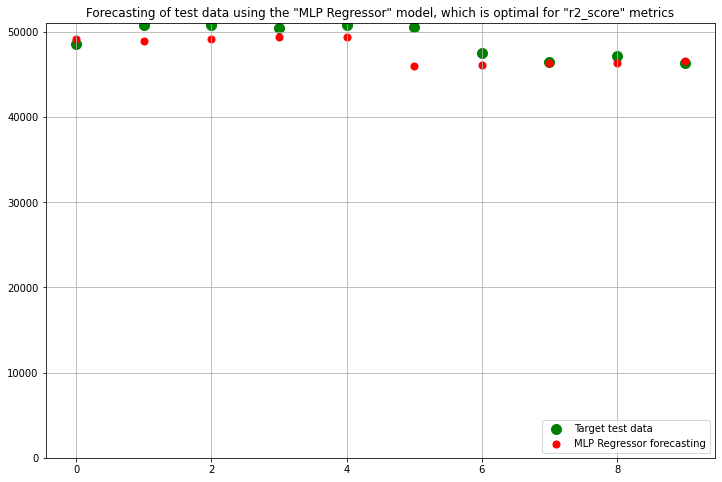

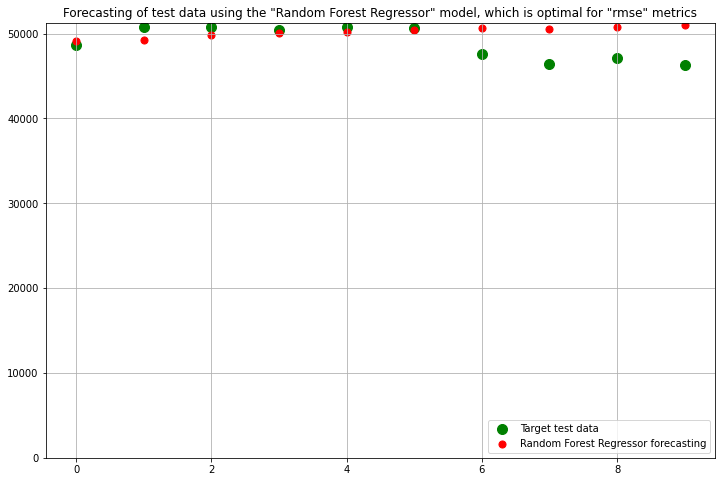

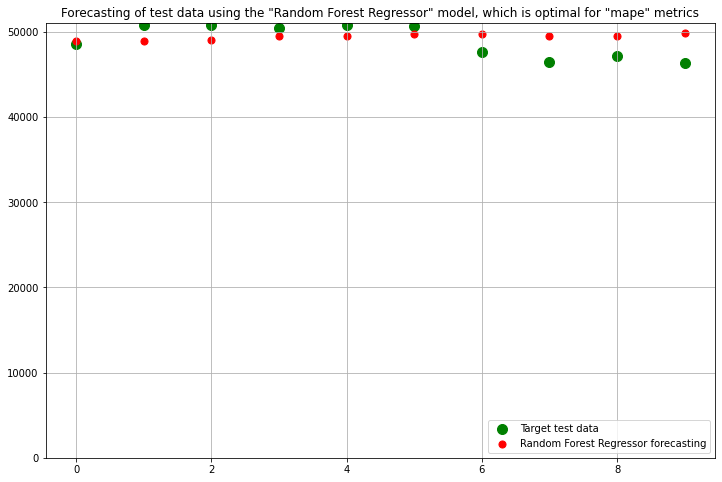

In [94]:
# Get the optimal model by different metrics
if len(result) > 0:
    for valid_metrics in ['r2_score', 'rmse', 'mape']:
        get_optimal_model_and_forecasting(result, valid_metrics, starting_point)    

### 5.5. Feature importance study <a class="anchor" id="5.5"></a>

[Back to Table of Contents](#0.1)

A feature importance study is performed for the best of the "non Тime Series" models, as no additional features were used in the Time Series models.

In [95]:
# Training ML optimal model for training+valid dataset
# Get parameters of the optimal model from dataframe result (without Time Series models) by main_metrics
if is_other_ML:
    main_metrics = 'r2_score'
    if (len(result) > 0) and (len(models) > 0):
        result_nonTS = result[(result['type_model']!='Prophet') & (result['type_model']!='ARIMA')].reset_index(drop=True)
        opt_name_model2, opt_type_model2, opt_params_model2 = get_params_optimal_model(result_nonTS, 
                                                                                main_metrics)

        result, model_opt, ypred = model_training_forecasting(result, 
                                                              train_valid_mf, 
                                                              y_train_valid_mf,
                                                              test_mf, 
                                                              ytest_mf,
                                                              opt_name_model2, 
                                                              opt_type_model2, 
                                                              opt_params_model2, 
                                                              '2')

name_model  r2_score         rmse      mape  \
4  Random Forest Regressor -1.346753  1891.733477  3.600522   

                                              params  
4  {'max_depth': 4, 'max_features': 'auto', 'min_...

Optimal model by metrics "r2_score" is "Random Forest Regressor" with type "Random Forest Regressor" parameters {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 50, 'min_samples_split': 30, 'n_estimators': 80}
Tuning model 'Random Forest Regressor'
Random Forest Regressor


In [96]:
# All features names
if is_other_ML:
    coeff = pd.DataFrame(train_valid_mf.columns)
    coeff.columns = ['feature']

In [97]:
def add_fi_coeff(coeff, col, list_new_fi_coeff=None, df_new_fi_coeff=None):
    # Adds new importance of features as feature col
    # from list list_new_fi_coeff or dataframe df_new_fi_coeff
    # to the resulting dataframe coeff with feature names 
    # Missed importance values are replaced by zero
    
    if list_new_fi_coeff is not None:
        df_new_fi_coeff = coeff[['feature']].copy()
        df_new_fi_coeff["score"] = pd.Series(list_new_fi_coeff)
    
    if df_new_fi_coeff is not None:
        # Rename df_new_fi_coeff
        df_new_fi_coeff.columns = ['feature', 'score']   # to the plot drawing
        df_new_fi_coeff[col] = df_new_fi_coeff['score']  # to the merging and saving
        
        # Merging dataframes - coeff of all features with new_fi_coeff
        coeff = coeff.merge(df_new_fi_coeff[['feature', col]], on='feature', how='left').fillna(0)
        
        is_score = True
    else:
        print(f'Data is absent fol {col}')
        is_score = False
        coeff = None
    
    return coeff, df_new_fi_coeff, is_score

Feature importance diagram with SHAP:


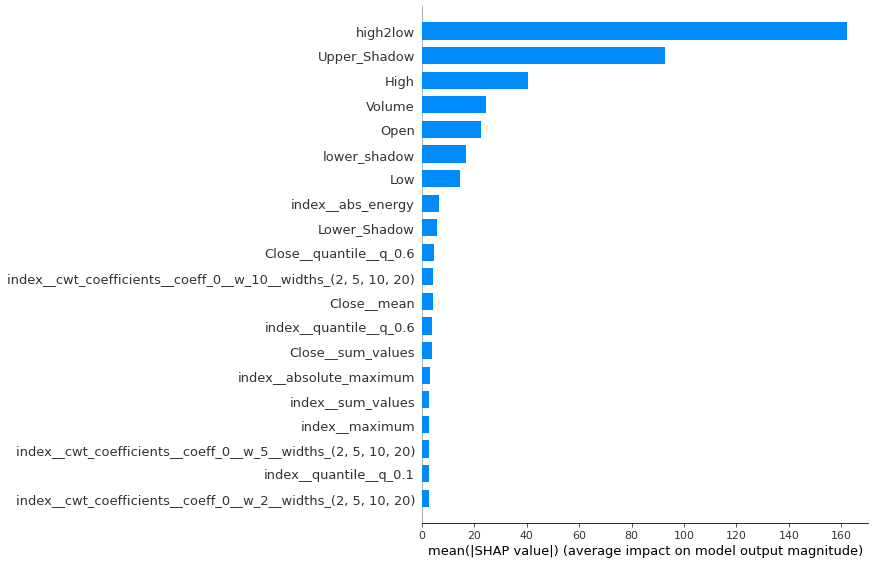

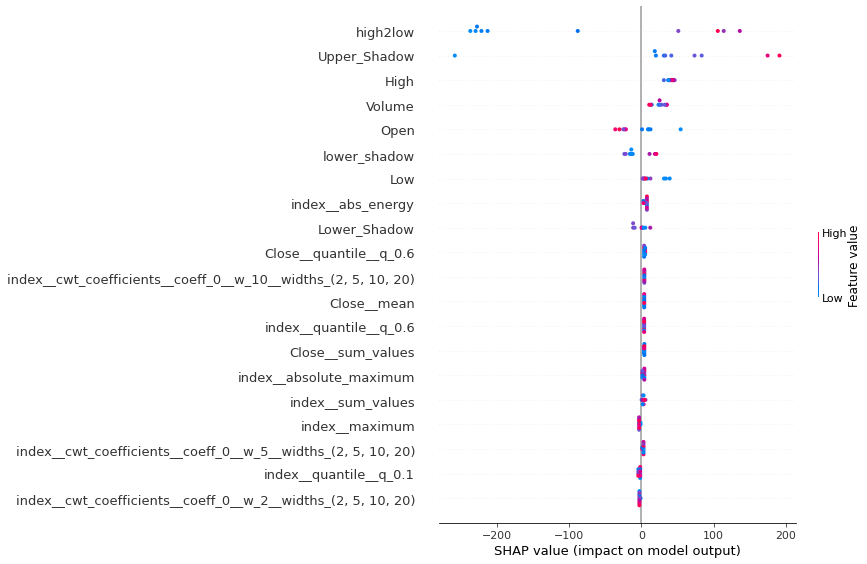

  0%|          | 0/10 [00:00<?, ?it/s]

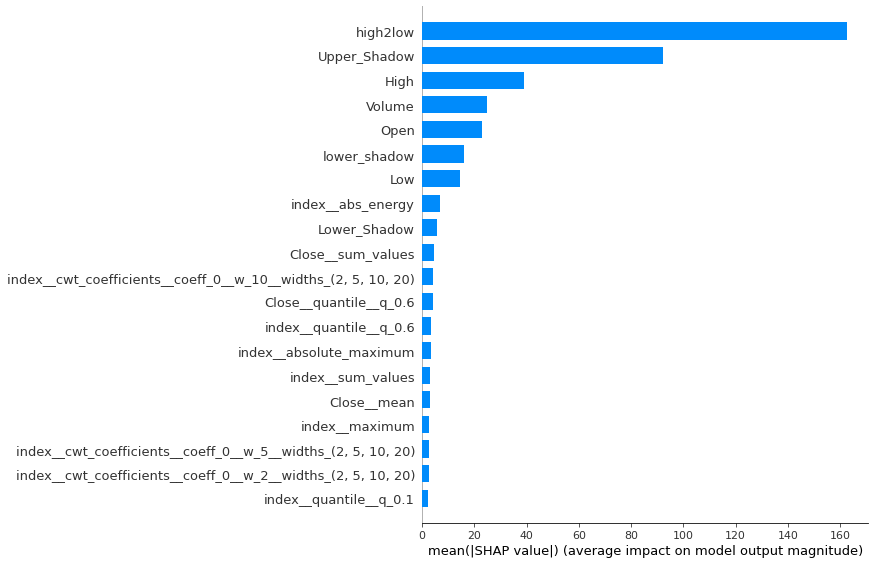

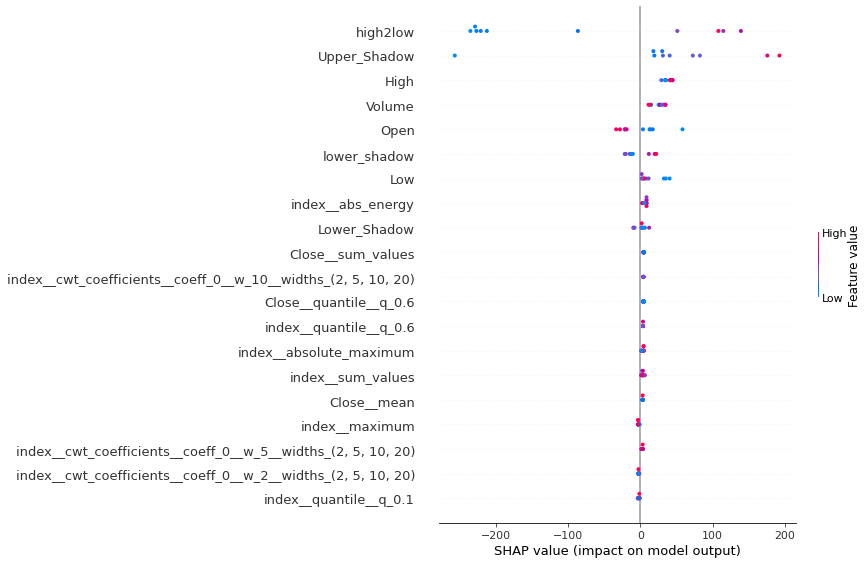

In [98]:
# Feature importance diagram with SHAP
if is_other_ML:
    if (len(result) > 0) and (len(models) > 0):
        print('Feature importance diagram with SHAP:')
        try:
            # Trees
            explainer = shap.TreeExplainer(model_opt)
            shap_values = explainer.shap_values(test_mf)
            shap.summary_plot(shap_values, test_mf, plot_type="bar", feature_names=coeff['feature'].tolist())
            shap.summary_plot(shap_values, test_mf)

            # Save permutation feature importance values
            coeff, _, is_SHAP_successfully = add_fi_coeff(coeff, 'shap_fi_score', shap_values)
        except: 
            try:
                # Other types of models
                explainer = shap.KernelExplainer(model_opt.predict, train_valid_mf)
                shap_values = explainer.shap_values(test_mf)

                # Plot drawing
                shap.summary_plot(shap_values, test_mf, plot_type="bar", feature_names=coeff['feature'].tolist())
                shap.summary_plot(shap_values, test_mf)

                # Get feature importance values from shap_values format
                # Thanks to https://stackoverflow.com/a/69523421/12301574
                shap_values_all = pd.DataFrame(shap_values, columns = test_mf.columns)
                vals = np.abs(shap_values_all.values).mean(0)
                shap_importance = pd.DataFrame(list(zip(test_mf.columns, vals)),
                                                  columns=['feature','score'])            

                # Saving feature importance values
                coeff, _, is_SHAP_successfully = add_fi_coeff(coeff, 'shap_fi_score', None, shap_importance)            

            except: 
                is_SHAP_successfully = False

        if not is_SHAP_successfully:
            print('Feature importance diagram for this optimal model is not supported in SHAP')

Feature importance diagram as the Force plot with SHAP:


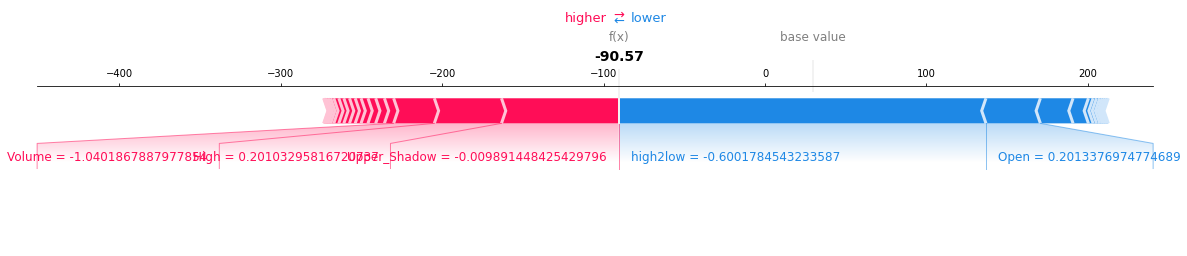

In [99]:
# Force plot - Feature importance diagram with SHAP for the certaion row in test_mf
if is_other_ML:
    if (len(result) > 0) and (len(models) > 0):
        row_number_in_test_mf = 0
        print('Feature importance diagram as the Force plot with SHAP:')
        if is_SHAP_successfully:
            shap.initjs()
            shap.force_plot(explainer.expected_value, shap_values[0,:], 
                            test_mf.loc[test_mf.index.tolist()[row_number_in_test_mf],:],
                            feature_names=coeff['feature'].tolist(),
                            matplotlib=True, show=False)
            plt.savefig('force_plot.png')

In [100]:
# Creation and drawing the feature importance diagrams
if is_other_ML:
    if (len(result) > 0) and (len(models) > 0):

        # Coefficients
        if opt_name_model2=='XGB Regressor':
            print('Feature importance diagram')
            # Coef. of the feature with nonzero importance
            xgb_coeff = pd.DataFrame.from_dict(model_opt.get_booster().get_score(importance_type='weight'), orient='index').reset_index(drop=False)
            coeff, _, is_score = add_fi_coeff(coeff, 'xgb_fi_coeff', None, xgb_coeff)

            # With the library xgboost
            fig =  plt.figure(figsize = (15,15))
            axes = fig.add_subplot(111)
            xgb.plot_importance(model_opt,ax = axes,height = 0.5)
            plt.show()
            plt.close()

        else:
            # With the library sklearn
            try:
                coef_model = model_opt.coef_
                coeff, coeff_new, is_score = add_fi_coeff(coeff, 'lr_fi_score', coef_model)
            except:
                try:
                    coef_model = feature_importances_
                    coeff, coeff_new, is_score = add_fi_coeff(coeff, 'model_fi_score', coef_model)
                except: 
                    print('The importance of the feature could not be obtained')
                    is_score = False

            if is_score:
                # Plot drawing
                coeff_non_zero = coeff_new[coeff_new['score']>0]
                plt.figure(figsize=(12, int(len(coeff_non_zero)*0.4)))
                coeff_non_zero = coeff_non_zero.sort_values(by='score', ascending=True)
                plt.barh(coeff_non_zero["feature"], coeff_non_zero["score"])
                plt.title("Feature importance diagram")
                plt.axvline(x=0, color=".5")
                plt.xlabel("Coefficient values")
                plt.subplots_adjust(left=0.3)

The importance of the feature could not be obtained


Permutation feature importance diagram:


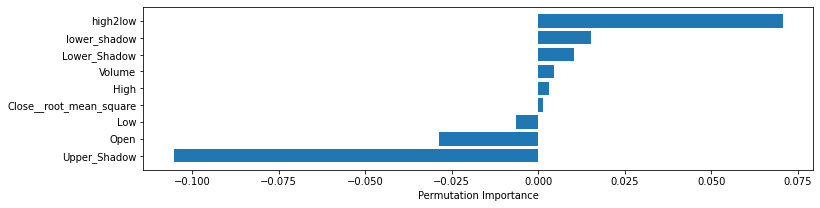

In [101]:
# Permutation feature importance diagram
if is_other_ML:
    if (len(result) > 0) and (len(models) > 0):
        try:
            perm_importance = permutation_importance(model_opt, test_mf, ytest_mf)

            # Save permutation feature importance values
            coef_model = perm_importance.importances_mean
            coeff, coeff_new, is_score = add_fi_coeff(coeff, 'perm_fi_score', coef_model)

            print('Permutation feature importance diagram:') 
            coeff_non_zero = coeff_new[coeff_new['score'].abs()>1e-4]
            coeff_non_zero = coeff_non_zero.sort_values(by='score', ascending=True)
            plt.figure(figsize=(12, int(len(coeff_non_zero)*0.4)))
            plt.barh(coeff_non_zero["feature"], coeff_non_zero["score"])
            plt.xlabel("Permutation Importance")
            plt.show()
            is_perm_importance = True
        except: print('Permutation feature importance diagram for this optimal model is not supported')

In [102]:
# Feature importance diagram with ELI5
if is_other_ML:
    if (len(result) > 0) and (len(models) > 0):
        try:
            print('Feature importance diagram with ELI5:')
            perm = PermutationImportance(model_opt).fit(test_mf,ytest_mf)

            # Save permutation feature importance values
            coef_model = perm.feature_importances_  # Feature importances, 
                                                    # computed as mean decrease 
                                                    # of the score when a feature 
                                                    # is permuted (i.e. becomes noise)
            coeff, _, is_score = add_fi_coeff(coeff, 'eli5_perm_fi_score', coef_model)

            # Display permutation feature importance values with ELI5
            display(eli5.show_weights(perm, feature_names = coeff.feature.tolist()))

        except: print('Feature importance diagram for this optimal model is not supported in ELI5')

Feature importance diagram with ELI5:


In [103]:
# Display and saving features importance values
if is_other_ML:
    if coeff.isna().sum().sum()==0:
        print('Feature importance values:')
        fi_cols = coeff.columns.tolist()[1:]
        if len(fi_cols) > 0:
            coeff = coeff.sort_values(by=fi_cols, ascending=False)
            display(coeff)
        coeff.to_csv(f'feature_importance_for_optimal_model_{opt_name_model2}.csv', index=False)

Feature importance values:


feature  shap_fi_score  \
58                                           high2low     162.709820   
55                                       Upper_Shadow      92.038567   
0                                                High      39.102323   
4                                              Volume      24.931997   
2                                                Open      22.956654   
57                                       lower_shadow      15.932865   
1                                                 Low      14.349984   
6                                   index__abs_energy       7.003785   
56                                       Lower_Shadow       5.777145   
32                                  Close__sum_values       4.554458   
24  index__cwt_coefficients__coeff_0__w_10__widths...       4.139933   
45                             Close__quantile__q_0.6       4.065975   
18                             index__quantile__q_0.6       3.556325   
11                            index__absolute_maximum       3.230983   
5                                   index__sum_values       3.097411   
35                                        Close__mean       3.092002   
10                                     index__maximum       2.841210   
23  index__cwt_coefficients__coeff_0__w_5__widths_...       2.789881   
22  index__cwt_coefficients__coeff_0__w_2__widths_...       2.588442   
14                             index__quantile__q_0.1       2.304342   
26       index__fft_coefficient__attr_"real"__coeff_0       1.974932   
9                             index__root_mean_square       1.862090   
27        index__fft_coefficient__attr_"abs"__coeff_0       1.809511   
36                            Close__root_mean_square       1.784945   
46                             Close__quantile__q_0.7       1.758648   
47                             Close__quantile__q_0.8       1.740253   
37                                     Close__maximum       1.424961   
3                                               Close       0.050712   
44                             Close__quantile__q_0.4       0.048347   
20                             index__quantile__q_0.8       0.043908   
52  Close__cwt_coefficients__coeff_0__w_20__widths...       0.039488   
51  Close__cwt_coefficients__coeff_0__w_10__widths...       0.031522   
15                             index__quantile__q_0.2       0.026058   
39                                     Close__minimum       0.020852   
12                                     index__minimum       0.020755   
21                             index__quantile__q_0.9       0.020458   
19                             index__quantile__q_0.7       0.018593   
13                         index__benford_correlation       0.017553   
53       Close__fft_coefficient__attr_"real"__coeff_0       0.016575   
59                               Close_diff_anomalous       0.015678   
40                         Close__benford_correlation       0.015289   
38                            Close__absolute_maximum       0.014672   
48                             Close__quantile__q_0.9       0.012916   
49  Close__cwt_coefficients__coeff_0__w_2__widths_...       0.008013   
25  index__cwt_coefficients__coeff_0__w_20__widths...       0.007044   
16                             index__quantile__q_0.3       0.006737   
34                                      Close__median       0.005436   
33                                  Close__abs_energy       0.004587   
42                             Close__quantile__q_0.2       0.004133   
7                                       index__median       0.000000   
8                                         index__mean       0.000000   
17                             index__quantile__q_0.4       0.000000   
28                        index__value_count__value_0       0.000000   
29                        index__value_count__value_1       0.000000   
30                  index__range_count__max_1__min_-1       0.000000   
31            

I hope you find this notebook useful and enjoyable.

Your comments and feedback are most welcome.

[Go to Top](#0)